In [1]:
# coklu imlec:ctrl+d
# coklu comment:ctrl+/

#preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

###   Makine Öğrenmesi Algoritma İmportları  ###
#https://scikit-learn.org/stable/

#Regresyon
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Sınıflandırma
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Denetimsiz Öğrenme
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #hiyerarşik kümeleme

#metrics
from sklearn.metrics import r2_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix

#Algoritmalar
!pip install apyori
from apyori import apriori

#NLP
#https://www.nltk.org/
#https://nlp.stanford.edu/
#https://www.tensorflow.org/text/tutorials/word2vec

#denetimsiz öğrenme
from sklearn.cluster import KMeans

#Boyut İndirgeme -PCA & LDA
#sebastianraschka.com
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Model Seçimi - Optimizasyonu
from sklearn.model_selection import cross_validate,GridSearchCV

#Deep Learning


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=98c9dd20ac639ac7c58338535bb0203563d081989355b64f0ac04390e57aaa0b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!wget http://bilkav.com/veriler.csv
!wget http://bilkav.com/eksikveriler.csv
!wget http://bilkav.com/satislar.csv
!wget http://bilkav.com/odev_tenis.csv
!wget http://bilkav.com/maaslar.csv
!wget http://bilkav.com/maaslar_yeni.csv
!wget http://bilkav.com/Iris.xls
!wget http://bilkav.com/musteriler.csv

--2023-12-12 18:07:32--  http://bilkav.com/veriler.csv
Resolving bilkav.com (bilkav.com)... 191.96.144.254, 2a02:4780:1e:f4b9:d4ee:b30:67d9:fa87
Connecting to bilkav.com (bilkav.com)|191.96.144.254|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bilkav.com/veriler.csv [following]
--2023-12-12 18:07:32--  https://bilkav.com/veriler.csv
Connecting to bilkav.com (bilkav.com)|191.96.144.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘veriler.csv’

veriler.csv             [ <=>                ]     359  --.-KB/s    in 0s      

2023-12-12 18:07:33 (51.2 MB/s) - ‘veriler.csv’ saved [359]

--2023-12-12 18:07:33--  http://bilkav.com/eksikveriler.csv
Resolving bilkav.com (bilkav.com)... 191.96.144.254, 2a02:4780:1e:f4b9:d4ee:b30:67d9:fa87
Connecting to bilkav.com (bilkav.com)|191.96.144.254|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: 

In [4]:
df=pd.read_csv("eksikveriler.csv")
df.head()

ulke  boy  kilo   yas cinsiyet
0   tr  130    30  10.0        e
1   tr  125    36  11.0        e
2   tr  135    34  10.0        k
3   tr  133    30   9.0        k
4   tr  129    38  12.0        e

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ulke      22 non-null     object 
 1   boy       22 non-null     int64  
 2   kilo      22 non-null     int64  
 3   yas       20 non-null     float64
 4   cinsiyet  22 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1008.0+ bytes


In [6]:
#eksik veriler
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
yas=df.iloc[:,1:4].values
imputer=imputer.fit(yas[:,1:4])
yas[:,1:4]=imputer.transform(yas[:,1:4])
yas#28.45

array([[130.  ,  30.  ,  10.  ],
       [125.  ,  36.  ,  11.  ],
       [135.  ,  34.  ,  10.  ],
       [133.  ,  30.  ,   9.  ],
       [129.  ,  38.  ,  12.  ],
       [180.  ,  90.  ,  30.  ],
       [190.  ,  80.  ,  25.  ],
       [175.  ,  90.  ,  35.  ],
       [177.  ,  60.  ,  22.  ],
       [185.  , 105.  ,  33.  ],
       [165.  ,  55.  ,  27.  ],
       [155.  ,  50.  ,  44.  ],
       [160.  ,  58.  ,  28.45],
       [162.  ,  59.  ,  41.  ],
       [167.  ,  62.  ,  55.  ],
       [174.  ,  70.  ,  47.  ],
       [193.  ,  90.  ,  28.45],
       [187.  ,  80.  ,  27.  ],
       [183.  ,  88.  ,  28.  ],
       [159.  ,  40.  ,  29.  ],
       [164.  ,  66.  ,  32.  ],
       [166.  ,  56.  ,  42.  ]])

In [7]:
mean_value = df['yas'].mean()

for index, value in df['yas'].items():  # iteritems -> items
    if pd.isna(value):
        df.loc[index, 'yas_deneme'] = mean_value
    else:
        df.loc[index, 'yas_deneme'] = value

In [8]:
df

ulke  boy  kilo   yas cinsiyet  yas_deneme
0    tr  130    30  10.0        e       10.00
1    tr  125    36  11.0        e       11.00
2    tr  135    34  10.0        k       10.00
3    tr  133    30   9.0        k        9.00
4    tr  129    38  12.0        e       12.00
5    tr  180    90  30.0        e       30.00
6    tr  190    80  25.0        e       25.00
7    tr  175    90  35.0        e       35.00
8    tr  177    60  22.0        k       22.00
9    us  185   105  33.0        e       33.00
10   us  165    55  27.0        k       27.00
11   us  155    50  44.0        k       44.00
12   us  160    58   NaN        k       28.45
13   us  162    59  41.0        k       41.00
14   us  167    62  55.0        k       55.00
15   fr  174    70  47.0        e       47.00
16   fr  193    90   NaN        e       28.45
17   fr  187    80  27.0        e       27.00
18   fr  183    88  28.0        e       28.00
19   fr  159    40  29.0        k       29.00
20   fr  164    66  32.0        k       32.00
21   fr  166    56  42.0        k       42.00

In [9]:
#Kategorik Veriler
ulke=df.iloc[:,0:1].values

from sklearn import preprocessing
ulke[:,0]=preprocessing.LabelEncoder().fit_transform(df.iloc[:,0])
print(ulke)

ulke=preprocessing.OneHotEncoder().fit_transform(ulke).toarray()
print(ulke)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [10]:
df

ulke  boy  kilo   yas cinsiyet  yas_deneme
0    tr  130    30  10.0        e       10.00
1    tr  125    36  11.0        e       11.00
2    tr  135    34  10.0        k       10.00
3    tr  133    30   9.0        k        9.00
4    tr  129    38  12.0        e       12.00
5    tr  180    90  30.0        e       30.00
6    tr  190    80  25.0        e       25.00
7    tr  175    90  35.0        e       35.00
8    tr  177    60  22.0        k       22.00
9    us  185   105  33.0        e       33.00
10   us  165    55  27.0        k       27.00
11   us  155    50  44.0        k       44.00
12   us  160    58   NaN        k       28.45
13   us  162    59  41.0        k       41.00
14   us  167    62  55.0        k       55.00
15   fr  174    70  47.0        e       47.00
16   fr  193    90   NaN        e       28.45
17   fr  187    80  27.0        e       27.00
18   fr  183    88  28.0        e       28.00
19   fr  159    40  29.0        k       29.00
20   fr  164    66  32.0        k       32.00
21   fr  166    56  42.0        k       42.00

In [11]:
yas=df.iloc[:,1:4]
yas

boy  kilo   yas
0   130    30  10.0
1   125    36  11.0
2   135    34  10.0
3   133    30   9.0
4   129    38  12.0
5   180    90  30.0
6   190    80  25.0
7   175    90  35.0
8   177    60  22.0
9   185   105  33.0
10  165    55  27.0
11  155    50  44.0
12  160    58   NaN
13  162    59  41.0
14  167    62  55.0
15  174    70  47.0
16  193    90   NaN
17  187    80  27.0
18  183    88  28.0
19  159    40  29.0
20  164    66  32.0
21  166    56  42.0

In [12]:
sonuc=pd.DataFrame(data=ulke,index=range(22),columns=["fr","tr","us"])
sonuc

sonuc2=pd.DataFrame(data=yas,index=range(22),columns=["boy","kilo","yas"])
sonuc2

cinsiyet=df.iloc[:,-1].values
sonuc3=pd.DataFrame(data=cinsiyet,index=range(22),columns=["cinsiyet"])

s=pd.concat([sonuc,sonuc2,sonuc3],axis=1)
s

fr   tr   us  boy  kilo   yas  cinsiyet
0   0.0  1.0  0.0  130    30  10.0     10.00
1   0.0  1.0  0.0  125    36  11.0     11.00
2   0.0  1.0  0.0  135    34  10.0     10.00
3   0.0  1.0  0.0  133    30   9.0      9.00
4   0.0  1.0  0.0  129    38  12.0     12.00
5   0.0  1.0  0.0  180    90  30.0     30.00
6   0.0  1.0  0.0  190    80  25.0     25.00
7   0.0  1.0  0.0  175    90  35.0     35.00
8   0.0  1.0  0.0  177    60  22.0     22.00
9   0.0  0.0  1.0  185   105  33.0     33.00
10  0.0  0.0  1.0  165    55  27.0     27.00
11  0.0  0.0  1.0  155    50  44.0     44.00
12  0.0  0.0  1.0  160    58   NaN     28.45
13  0.0  0.0  1.0  162    59  41.0     41.00
14  0.0  0.0  1.0  167    62  55.0     55.00
15  1.0  0.0  0.0  174    70  47.0     47.00
16  1.0  0.0  0.0  193    90   NaN     28.45
17  1.0  0.0  0.0  187    80  27.0     27.00
18  1.0  0.0  0.0  183    88  28.0     28.00
19  1.0  0.0  0.0  159    40  29.0     29.00
20  1.0  0.0  0.0  164    66  32.0     32.00
21  1.0  0.0  0.0  166    56  42.0     42.00

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(s,sonuc3,test_size=0.33,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [15]:
print(X_train,X_test)

[[-0.63245553  0.8660254  -0.40824829  0.45049444 -0.29657884 -0.17552416
  -0.24717129]
 [-0.63245553  0.8660254  -0.40824829  1.00824945  0.5096549   0.08776208
   0.03416189]
 [ 1.58113883 -1.15470054 -0.40824829  1.13696215  0.91277178         nan
   0.35769504]
 [-0.63245553  0.8660254  -0.40824829 -1.6089087  -1.18343596 -1.05314493
  -1.18494855]
 [-0.63245553  0.8660254  -0.40824829 -1.35148331 -1.34468271 -1.22866909
  -1.372504  ]
 [-0.63245553  0.8660254  -0.40824829  0.57920713  0.91277178  0.52657247
   0.50305051]
 [ 1.58113883 -1.15470054 -0.40824829  0.87953676  0.5096549   0.26328623
   0.22171734]
 [-0.63245553 -1.15470054  2.44948974  0.79372829  1.51744708  0.7898587
   0.78438369]
 [-0.63245553  0.8660254  -0.40824829  0.36468597  0.91277178  0.96538285
   0.97193914]
 [ 1.58113883 -1.15470054 -0.40824829  0.70791983  0.8321484   0.35104831
   0.31549506]
 [-0.63245553  0.8660254  -0.40824829 -1.43729177 -1.50592946 -1.31643117
  -1.46628173]
 [-0.63245553  0.86602

In [16]:
veri=pd.read_csv("satislar.csv")
veri.head()

Aylar  Satislar
0      8   19671.5
1     10   23102.5
2     11   18865.5
3     13   21762.5
4     14   19945.5

In [17]:
X=veri.drop("Satislar",axis=1)
y=veri[["Satislar"]]

In [18]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [20]:
print(f"X_train:{X_train[0:5]} y_train:{X_test[0:5]}")

X_train:[[-0.8509931 ]
 [-0.07916215]
 [-0.79162149]
 [-0.25727698]
 [ 0.98952686]] y_train:[[-1.32596599]
 [ 1.82072942]
 [-0.43539182]
 [-0.49476343]
 [ 1.52387136]]


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_test)

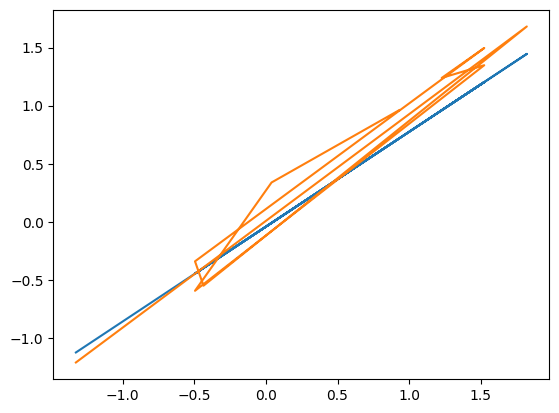

In [23]:
plt.plot(X_test,y_pred)
plt.plot(X_test,y_test)

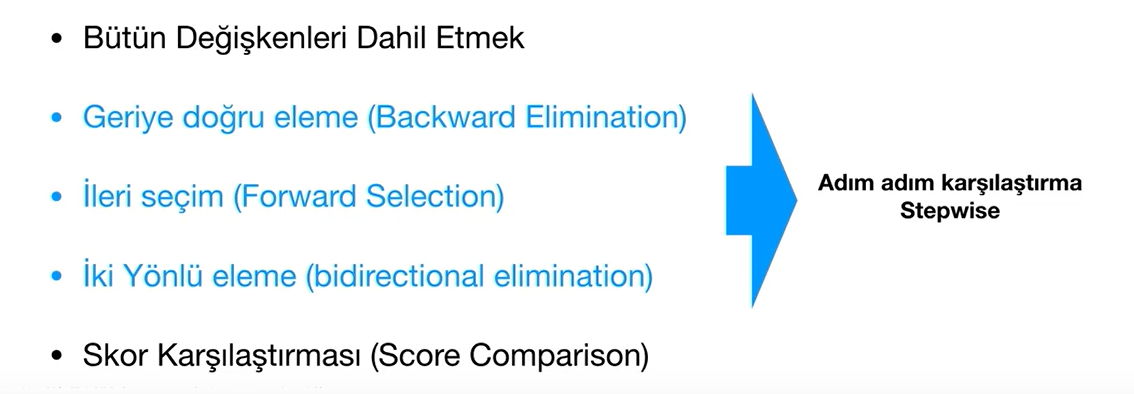

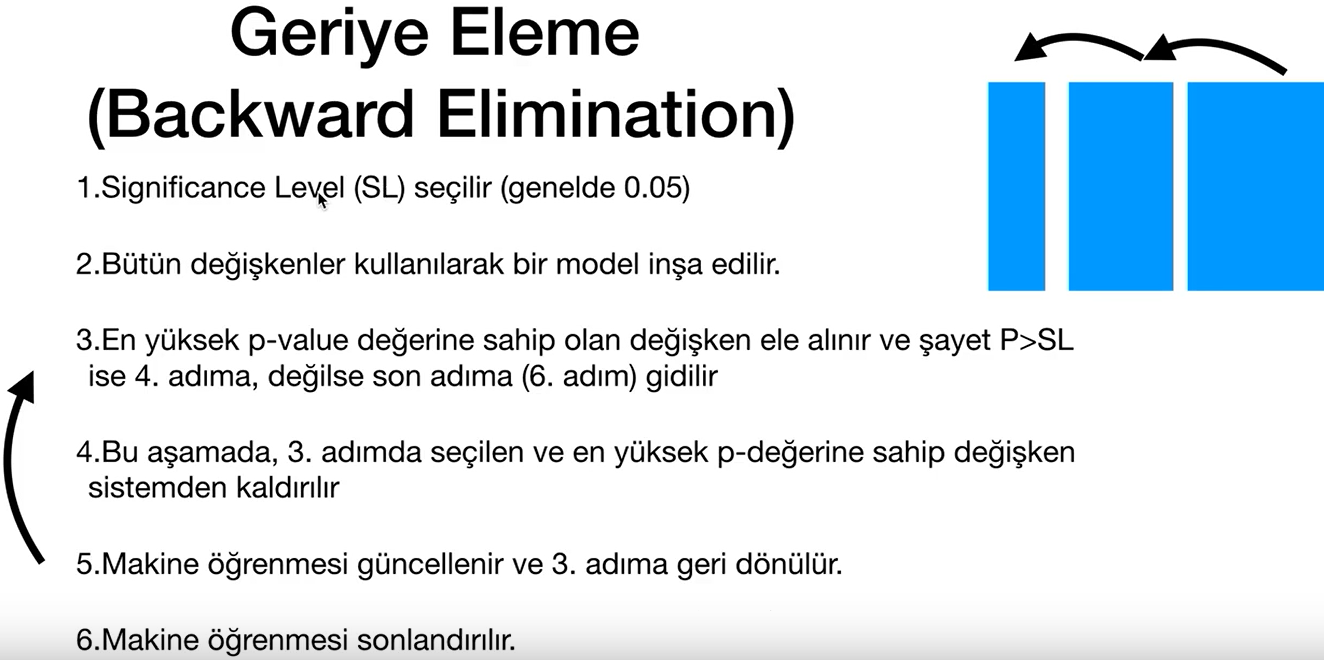

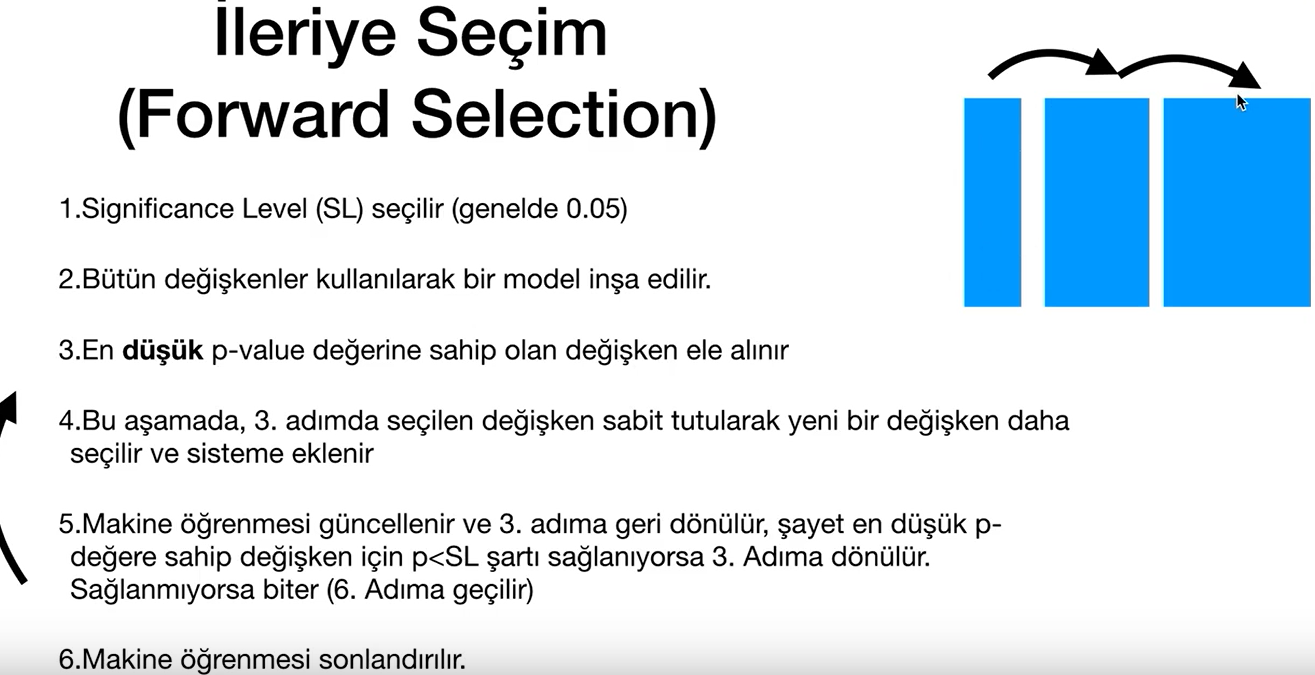

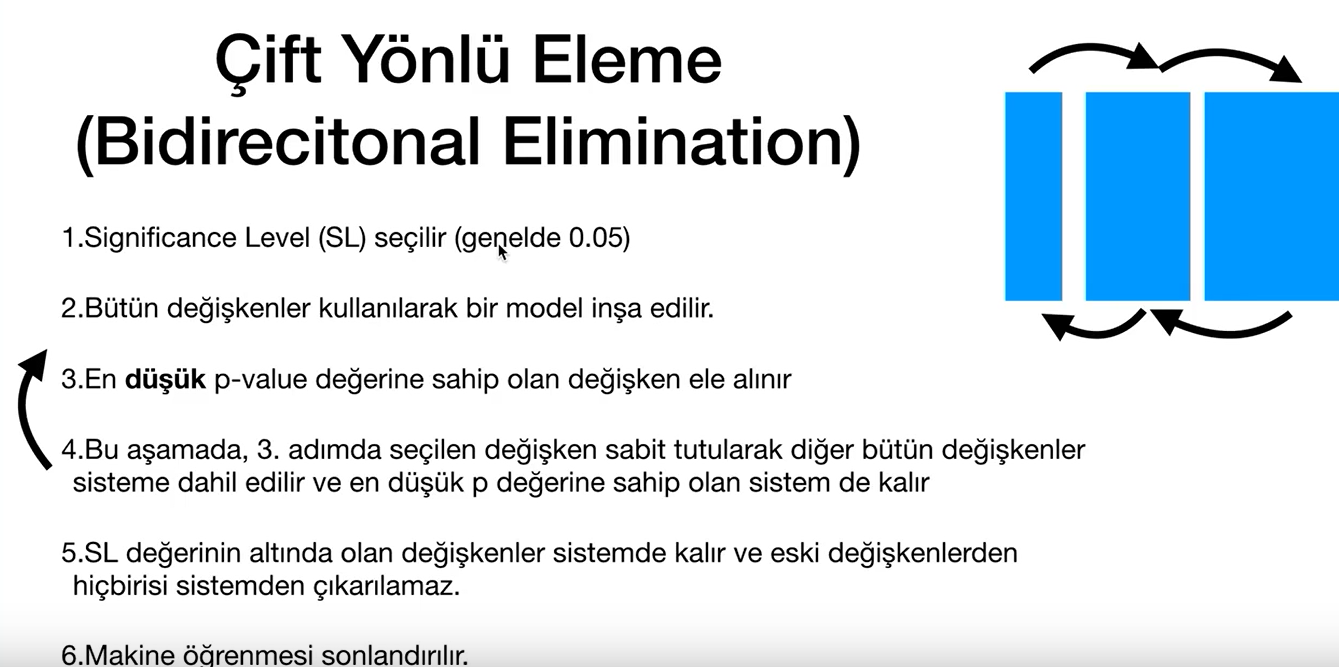

In [24]:
data=pd.read_csv("veriler.csv")
data.head()

ulke  boy  kilo  yas cinsiyet
0   tr  130    30   10        e
1   tr  125    36   11        e
2   tr  135    34   10        k
3   tr  133    30    9        k
4   tr  129    38   12        e

In [25]:
#çoklu doğrusal regresyon
#sex=data.iloc[:,-1].values
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data["cinsiyet_le"]=le.fit_transform(data["cinsiyet"])
data.head()

ulke  boy  kilo  yas cinsiyet  cinsiyet_le
0   tr  130    30   10        e            0
1   tr  125    36   11        e            0
2   tr  135    34   10        k            1
3   tr  133    30    9        k            1
4   tr  129    38   12        e            0

In [26]:
sex=data.iloc[:,-1:].values
ulke=data.iloc[:,0:1].values

#x=data[["ulke"]]
#xx=ohe.fit_transform(x).toarray()

ohe=preprocessing.OneHotEncoder()
sex_ohe=ohe.fit_transform(sex).toarray()
ulke_ohe=ohe.fit_transform(ulke).toarray()
ulke_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [27]:
sex_ohe=pd.DataFrame(data=sex_ohe,columns=["e","k"])
sex_ohe.head(3)

ulke_ohe=pd.DataFrame(data=ulke_ohe,columns=["fr","tr","us"])
ulke_ohe.head(3)

merge_data=pd.concat([ulke_ohe,data,sex_ohe],axis=1)
merge_data

fr   tr   us ulke  boy  kilo  yas cinsiyet  cinsiyet_le    e    k
0   0.0  1.0  0.0   tr  130    30   10        e            0  1.0  0.0
1   0.0  1.0  0.0   tr  125    36   11        e            0  1.0  0.0
2   0.0  1.0  0.0   tr  135    34   10        k            1  0.0  1.0
3   0.0  1.0  0.0   tr  133    30    9        k            1  0.0  1.0
4   0.0  1.0  0.0   tr  129    38   12        e            0  1.0  0.0
5   0.0  1.0  0.0   tr  180    90   30        e            0  1.0  0.0
6   0.0  1.0  0.0   tr  190    80   25        e            0  1.0  0.0
7   0.0  1.0  0.0   tr  175    90   35        e            0  1.0  0.0
8   0.0  1.0  0.0   tr  177    60   22        k            1  0.0  1.0
9   0.0  0.0  1.0   us  185   105   33        e            0  1.0  0.0
10  0.0  0.0  1.0   us  165    55   27        k            1  0.0  1.0
11  0.0  0.0  1.0   us  155    50   44        k            1  0.0  1.0
12  0.0  0.0  1.0   us  160    58   39        k            1  0.0  1.0
13  0.0  0.0  1.0   us  162    59   41        k            1  0.0  1.0
14  0.0  0.0  1.0   us  167    62   55        k            1  0.0  1.0
15  1.0  0.0  0.0   fr  174    70   47        e            0  1.0  0.0
16  1.0  0.0  0.0   fr  193    90   23        e            0  1.0  0.0
17  1.0  0.0  0.0   fr  187    80   27        e            0  1.0  0.0
18  1.0  0.0  0.0   fr  183    88   28        e            0  1.0  0.0
19  1.0  0.0  0.0   fr  159    40   29        k            1  0.0  1.0
20  1.0  0.0  0.0   fr  164    66   32        k            1  0.0  1.0
21  1.0  0.0  0.0   fr  166    56   42        k            1  0.0  1.0

In [28]:
data_tbl=merge_data.drop("cinsiyet",axis=1)

In [29]:
data_tbl=merge_data.drop("ulke",axis=1)

In [30]:
data_tbl["cinsiyet"]=data_tbl["cinsiyet_le"]

datalar=data_tbl.drop(["cinsiyet_le","e","k"],axis=1)

In [31]:
datalar.head()

fr   tr   us  boy  kilo  yas  cinsiyet
0  0.0  1.0  0.0  130    30   10         0
1  0.0  1.0  0.0  125    36   11         0
2  0.0  1.0  0.0  135    34   10         1
3  0.0  1.0  0.0  133    30    9         1
4  0.0  1.0  0.0  129    38   12         0

In [32]:
X=datalar.drop("cinsiyet",axis=1)
y=datalar["cinsiyet"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [35]:
y_pred=regressor.predict(X_test)
y_pred

array([0.01279796, 1.12036863, 0.94990297, 0.92862582, 0.27526065,
       0.35384956, 1.03567453, 0.67387829])

In [36]:
y_test

20    1
10    1
14    1
13    1
1     0
21    1
11    1
19    1
Name: cinsiyet, dtype: int64

In [37]:
boy=datalar.iloc[:,3:4].values
sol_kısım=datalar.iloc[:,:3]
sag_kısım=datalar.iloc[:,4:]

In [38]:
veri=pd.concat([sol_kısım,sag_kısım],axis=1)

In [39]:
veri

fr   tr   us  kilo  yas  cinsiyet
0   0.0  1.0  0.0    30   10         0
1   0.0  1.0  0.0    36   11         0
2   0.0  1.0  0.0    34   10         1
3   0.0  1.0  0.0    30    9         1
4   0.0  1.0  0.0    38   12         0
5   0.0  1.0  0.0    90   30         0
6   0.0  1.0  0.0    80   25         0
7   0.0  1.0  0.0    90   35         0
8   0.0  1.0  0.0    60   22         1
9   0.0  0.0  1.0   105   33         0
10  0.0  0.0  1.0    55   27         1
11  0.0  0.0  1.0    50   44         1
12  0.0  0.0  1.0    58   39         1
13  0.0  0.0  1.0    59   41         1
14  0.0  0.0  1.0    62   55         1
15  1.0  0.0  0.0    70   47         0
16  1.0  0.0  0.0    90   23         0
17  1.0  0.0  0.0    80   27         0
18  1.0  0.0  0.0    88   28         0
19  1.0  0.0  0.0    40   29         1
20  1.0  0.0  0.0    66   32         1
21  1.0  0.0  0.0    56   42         1

In [40]:
X_train,X_test,y_train,y_test=train_test_split(veri,boy,test_size=0.33,random_state=0)

In [41]:
regressor2=LinearRegression()
regressor2.fit(X_train,y_train)

y_pred=regressor2.predict(X_test)
y_pred

array([[182.26638686],
       [152.87161474],
       [162.79386375],
       [158.30668577],
       [130.82888952],
       [173.96138408],
       [150.12782663],
       [157.26898922]])

In [42]:
y_test

array([[164],
       [165],
       [167],
       [162],
       [125],
       [166],
       [155],
       [159]])

In [43]:
len(veri)

22

In [44]:
veri.head()

fr   tr   us  kilo  yas  cinsiyet
0  0.0  1.0  0.0    30   10         0
1  0.0  1.0  0.0    36   11         0
2  0.0  1.0  0.0    34   10         1
3  0.0  1.0  0.0    30    9         1
4  0.0  1.0  0.0    38   12         0

In [45]:
import statsmodels.api as sm
x=np.append(arr=np.ones((22,1)).astype(int),values=veri,axis=1)#len(veri) -->22
x

array([[  1.,   0.,   1.,   0.,  30.,  10.,   0.],
       [  1.,   0.,   1.,   0.,  36.,  11.,   0.],
       [  1.,   0.,   1.,   0.,  34.,  10.,   1.],
       [  1.,   0.,   1.,   0.,  30.,   9.,   1.],
       [  1.,   0.,   1.,   0.,  38.,  12.,   0.],
       [  1.,   0.,   1.,   0.,  90.,  30.,   0.],
       [  1.,   0.,   1.,   0.,  80.,  25.,   0.],
       [  1.,   0.,   1.,   0.,  90.,  35.,   0.],
       [  1.,   0.,   1.,   0.,  60.,  22.,   1.],
       [  1.,   0.,   0.,   1., 105.,  33.,   0.],
       [  1.,   0.,   0.,   1.,  55.,  27.,   1.],
       [  1.,   0.,   0.,   1.,  50.,  44.,   1.],
       [  1.,   0.,   0.,   1.,  58.,  39.,   1.],
       [  1.,   0.,   0.,   1.,  59.,  41.,   1.],
       [  1.,   0.,   0.,   1.,  62.,  55.,   1.],
       [  1.,   1.,   0.,   0.,  70.,  47.,   0.],
       [  1.,   1.,   0.,   0.,  90.,  23.,   0.],
       [  1.,   1.,   0.,   0.,  80.,  27.,   0.],
       [  1.,   1.,   0.,   0.,  88.,  28.,   0.],
       [  1.,   1.,   0.,   0.,

In [46]:
x_l=veri.iloc[:,[0,1,2,3,4,5]].values
x_l=np.array(x_l,dtype=float)
model=sm.OLS(boy,x_l).fit()
#boy üzerindeki etkiyi çözmek

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.41e-07
Time:                        18:07:40   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.4708      9.878     10.475      0.0

In [47]:
x_l=veri.iloc[:,[0,1,2,3,5]].values
x_l=np.array(x_l,dtype=float)
model=sm.OLS(boy,x_l).fit()
#boy üzerindeki etkiyi çözmek
#backward elemenation.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           9.32e-08
Time:                        18:07:40   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           104.5490      9.193     11.373      0.0

CASE I

In [48]:
tenis=pd.read_csv("odev_tenis.csv")
tenis.head()

outlook  temperature  humidity  windy play
0     sunny           85        85  False   no
1     sunny           80        90   True   no
2  overcast           83        86  False  yes
3     rainy           70        96  False  yes
4     rainy           68        80  False  yes

In [49]:
tenis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     int64 
 2   humidity     14 non-null     int64 
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [50]:
tenis["windy"].value_counts()

False    8
True     6
Name: windy, dtype: int64

In [51]:
tenis["play"].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [52]:
tenis["outlook"].value_counts()

sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

In [53]:
tenis.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

In [54]:
data=np.append(np.ones((len(tenis),1)).astype(int),tenis,axis=1)
data=pd.DataFrame(data,columns=["matris",'outlook', 'temperature', 'humidity', 'windy', 'play'])
data

matris   outlook temperature humidity  windy play
0       1     sunny          85       85  False   no
1       1     sunny          80       90   True   no
2       1  overcast          83       86  False  yes
3       1     rainy          70       96  False  yes
4       1     rainy          68       80  False  yes
5       1     rainy          65       70   True   no
6       1  overcast          64       65   True  yes
7       1     sunny          72       95  False   no
8       1     sunny          69       70  False  yes
9       1     rainy          75       80  False  yes
10      1     sunny          75       70   True  yes
11      1  overcast          72       90   True  yes
12      1  overcast          81       75  False  yes
13      1     rainy          71       91   True   no

In [55]:
x=data.iloc[:,0:2]
x

matris   outlook
0       1     sunny
1       1     sunny
2       1  overcast
3       1     rainy
4       1     rainy
5       1     rainy
6       1  overcast
7       1     sunny
8       1     sunny
9       1     rainy
10      1     sunny
11      1  overcast
12      1  overcast
13      1     rainy

In [56]:
from sklearn import preprocessing
onehot=preprocessing.OneHotEncoder()
ohe=onehot.fit_transform(x).toarray()
ohe=pd.DataFrame(ohe,columns=["matris","overcast","rainy","sunny"])
ohe.head()

matris  overcast  rainy  sunny
0     1.0       0.0    0.0    1.0
1     1.0       0.0    0.0    1.0
2     1.0       1.0    0.0    0.0
3     1.0       0.0    1.0    0.0
4     1.0       0.0    1.0    0.0

In [57]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
le1=label_encoder.fit_transform(tenis["windy"])
le2=label_encoder.fit_transform(tenis["play"])

le1=pd.DataFrame(le1,columns=["windy"])
le2=pd.DataFrame(le2,columns=["play"])

le=pd.concat([le1,le2],axis=1)
le


windy  play
0       0     0
1       1     0
2       0     1
3       0     1
4       0     1
5       1     0
6       1     1
7       0     0
8       0     1
9       0     1
10      1     1
11      1     1
12      0     1
13      1     0

In [58]:
merged_data=pd.concat([ohe,data[["temperature"]],data[["humidity"]],le],axis=1)
merged_data=merged_data.drop("matris",axis=1)

In [59]:
merged_data

overcast  rainy  sunny temperature humidity  windy  play
0        0.0    0.0    1.0          85       85      0     0
1        0.0    0.0    1.0          80       90      1     0
2        1.0    0.0    0.0          83       86      0     1
3        0.0    1.0    0.0          70       96      0     1
4        0.0    1.0    0.0          68       80      0     1
5        0.0    1.0    0.0          65       70      1     0
6        1.0    0.0    0.0          64       65      1     1
7        0.0    0.0    1.0          72       95      0     0
8        0.0    0.0    1.0          69       70      0     1
9        0.0    1.0    0.0          75       80      0     1
10       0.0    0.0    1.0          75       70      1     1
11       1.0    0.0    0.0          72       90      1     1
12       1.0    0.0    0.0          81       75      0     1
13       0.0    1.0    0.0          71       91      1     0

In [60]:
X=merged_data.drop("play",axis=1)
y=merged_data["play"]

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model=lr.fit(X_train,y_train)


In [63]:
y_pred=model.predict(X_test)
Y_pred=pd.DataFrame(y_pred,columns=["prediction"])
Y_pred

prediction
0           1
1           1
2           1
3           0
4           1

In [64]:
Y_test=pd.DataFrame(y_pred,columns=["y_test"])

In [65]:
sonuc=pd.concat([Y_test,Y_pred],axis=1)
sonuc

y_test  prediction
0       1           1
1       1           1
2       1           1
3       0           0
4       1           1

In [66]:
#OLS yapılcak.
#data.apply(LabelEncoder().fit_transform)

In [67]:
veri=pd.read_csv("maaslar.csv")
veri.head()

unvan  Egitim Seviyesi  maas
0             Cayci                1  2250
1          Sekreter                2  2500
2  Uzman Yardimcisi                3  3000
3             Uzman                4  4000
4  Proje Yoneticisi                5  5500

In [68]:
veri["unvan"].value_counts()

Cayci               1
Sekreter            1
Uzman Yardimcisi    1
Uzman               1
Proje Yoneticisi    1
Sef                 1
Mudur               1
Direktor            1
C-level             1
CEO                 1
Name: unvan, dtype: int64

In [69]:
x=veri.iloc[:,1:2]
y=veri.iloc[:,2:]

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression().fit(x,y)

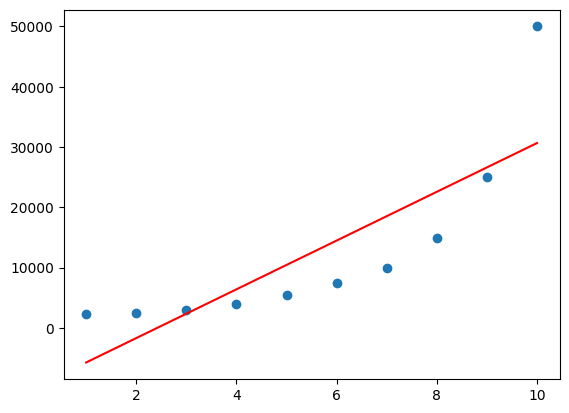

In [71]:
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color="r")

In [72]:
from sklearn.preprocessing import PolynomialFeatures
#herhangi bir sayıyı polinimal ifade etmek.
poly_reg=PolynomialFeatures(degree=2)#2. dereceden bir obje olustur.
x_poly=poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

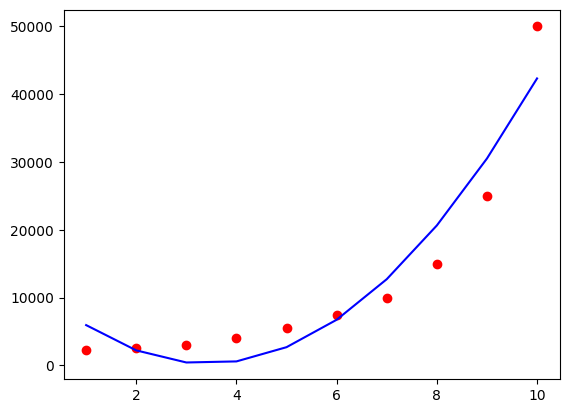

In [73]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(x,y,color="r")
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color="b")

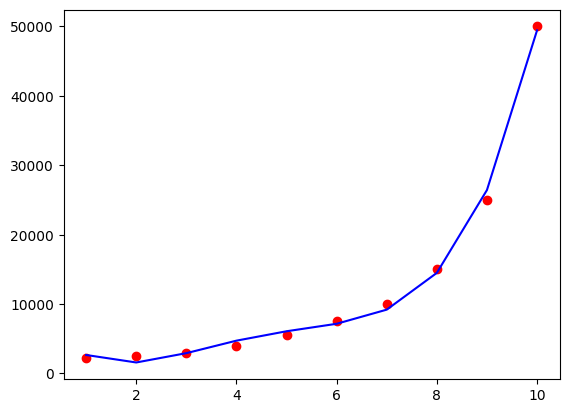

In [74]:
poly_reg=PolynomialFeatures(degree=4)#4. dereceden bir obje olustur.
x_poly=poly_reg.fit_transform(x)
x_poly
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(x,y,color="r")
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color="b")

In [75]:
print(lin_reg.predict([[6.6]]))

[[16923.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[8146.9948718]]


In [77]:
#support vector regression machine


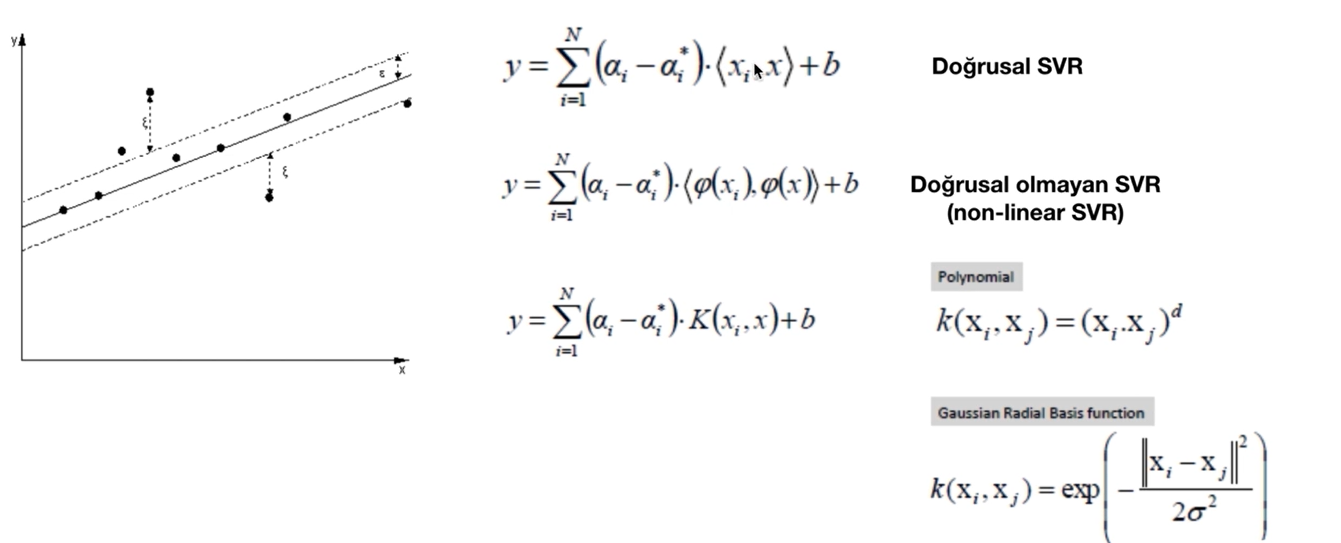

In [78]:
veri.columns

Index(['unvan', 'Egitim Seviyesi', 'maas'], dtype='object')

In [79]:
data=veri.copy()

In [80]:

data.head()

unvan  Egitim Seviyesi  maas
0             Cayci                1  2250
1          Sekreter                2  2500
2  Uzman Yardimcisi                3  3000
3             Uzman                4  4000
4  Proje Yoneticisi                5  5500

In [81]:
data=data.drop("unvan",axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler
veri2=data.apply(lambda x : StandardScaler().fit_transform(x.values.reshape(-1,1)).flatten())
veri2

Egitim Seviyesi      maas
0        -1.566699 -0.720043
1        -1.218544 -0.702438
2        -0.870388 -0.667228
3        -0.522233 -0.596808
4        -0.174078 -0.491178
5         0.174078 -0.350339
6         0.522233 -0.174289
7         0.870388  0.177810
8         1.218544  0.882008
9         1.566699  2.642503

In [83]:
X=veri2[["Egitim Seviyesi"]]
y=veri2[["maas"]]

In [84]:
from sklearn.svm import SVR
#svr_rbf = SVR(kernel="rbf" or kernel="linear" or kernel="poly")
svr=SVR(kernel="rbf")
svr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

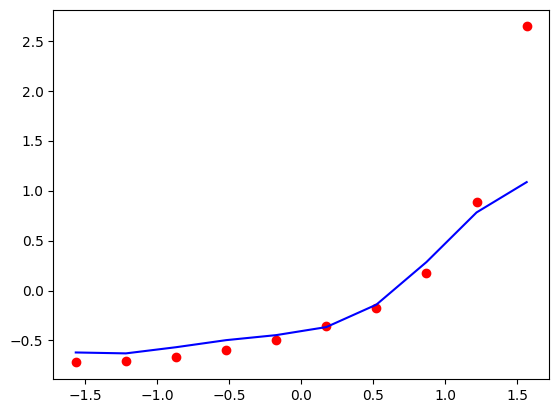

In [85]:
plt.scatter(X,y,color="red")
plt.plot(X,svr.predict(X),color="b")
plt.show()

In [86]:
#karar ağaçları

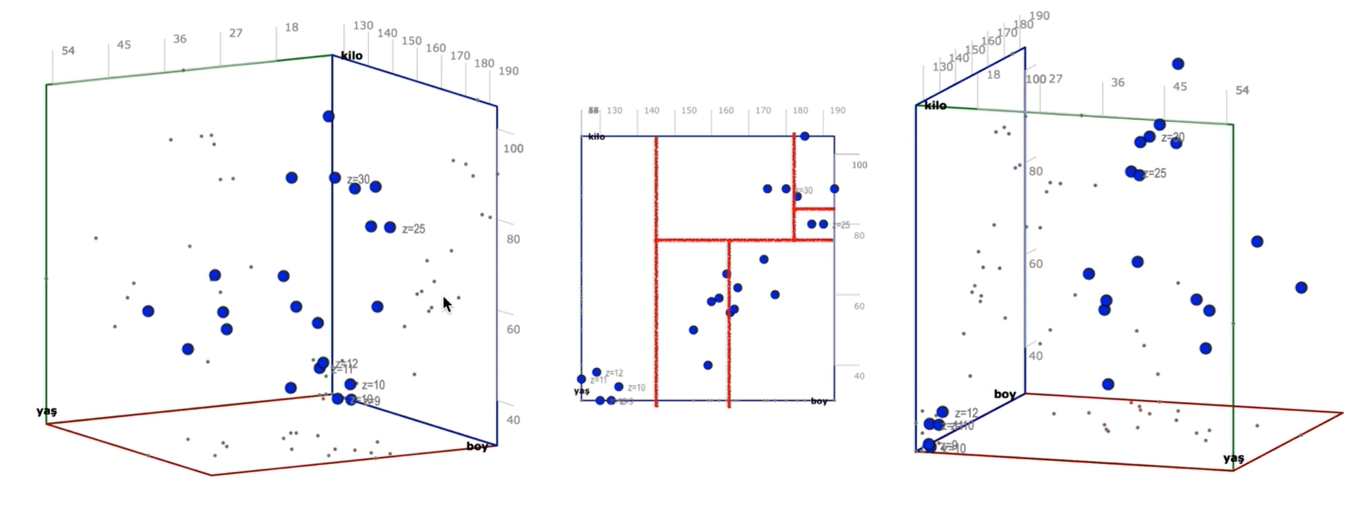

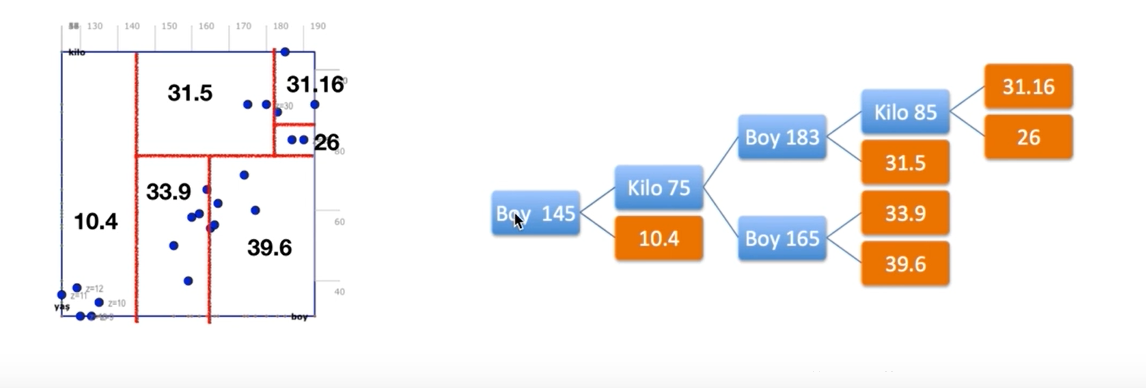

In [87]:
data

Egitim Seviyesi   maas
0                1   2250
1                2   2500
2                3   3000
3                4   4000
4                5   5500
5                6   7500
6                7  10000
7                8  15000
8                9  25000
9               10  50000

In [88]:
X=data[["Egitim Seviyesi"]]
y=data[["maas"]]

In [89]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
tree.fit(X,y)

DecisionTreeRegressor(random_state=0)

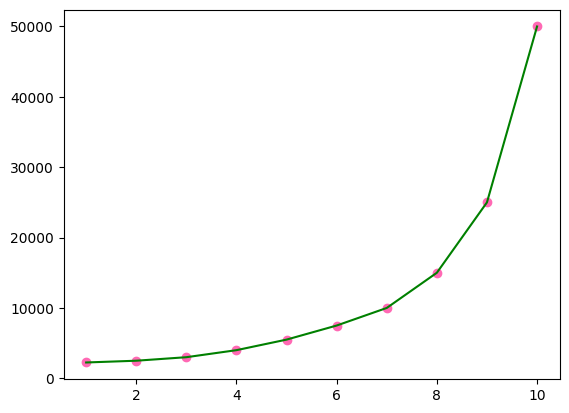

In [90]:
plt.scatter(X,y,color="hotpink")
plt.plot(X,tree.predict(X),color="green")
plt.show()

In [91]:
print(tree.predict([[4.5]]))

[4000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [92]:
#Rassal Ağaçlar - Random Forest


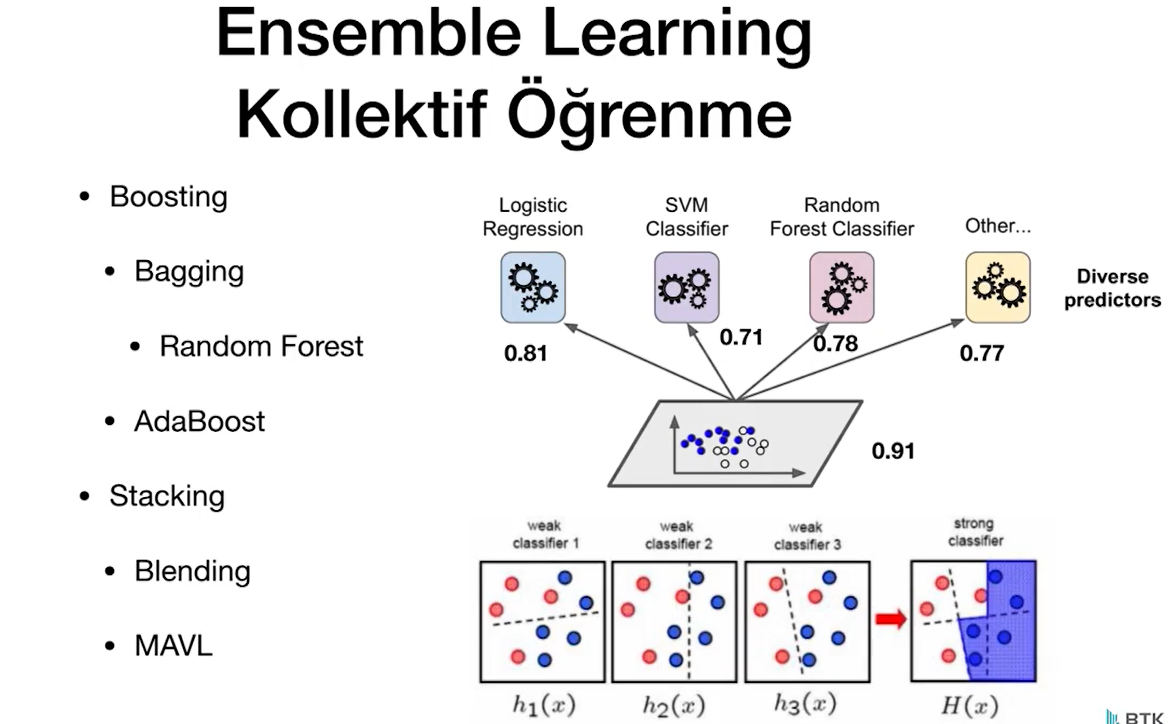

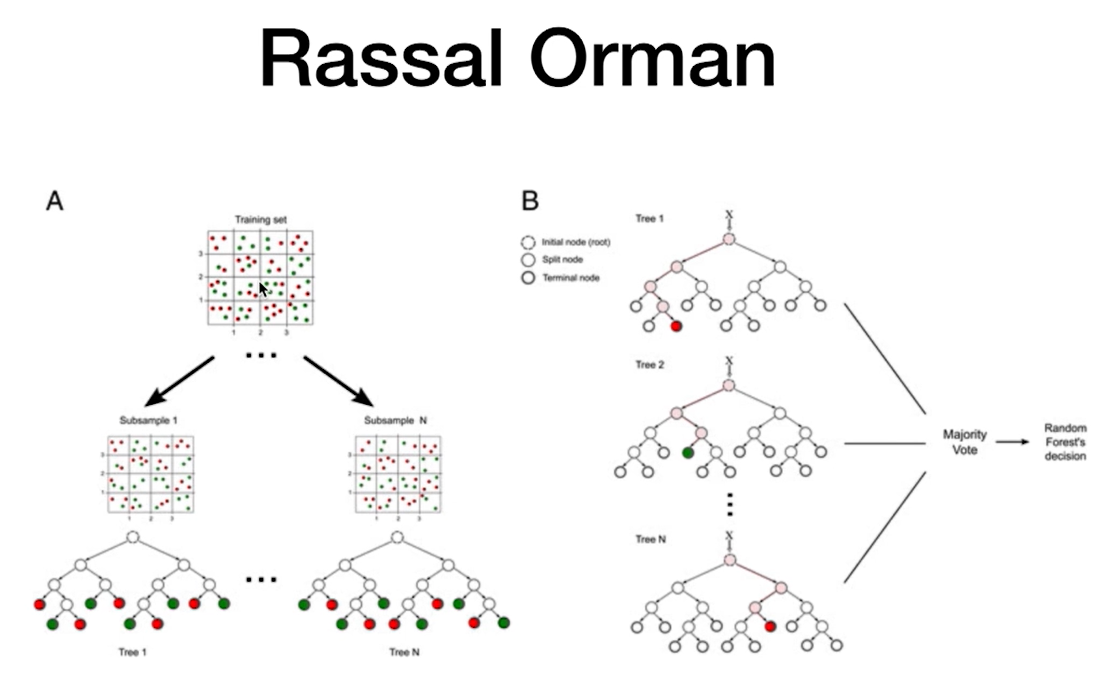

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0)#n_estimator == kaç ağaç çizilcek
rf_reg.fit(X,y)

<ipython-input-93-257f00fc10a4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X,y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
print(rf_reg.predict([[6.6]]))

[10500.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


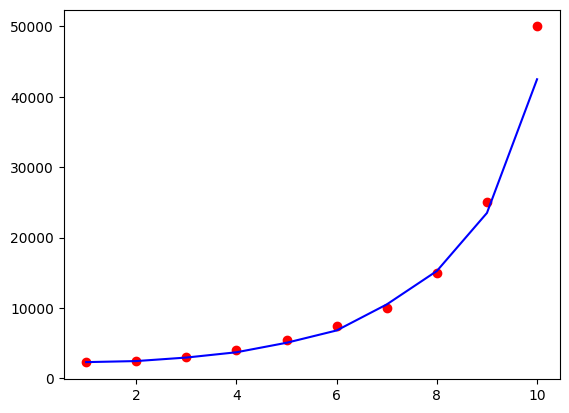

In [95]:
plt.scatter(X,y,color="red")
plt.plot(X,rf_reg.predict(X),color="blue")

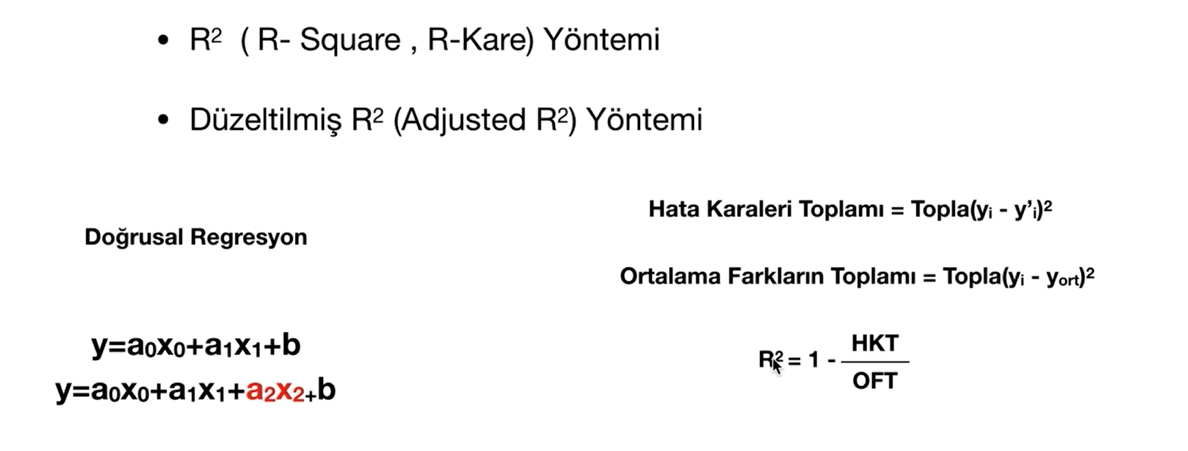

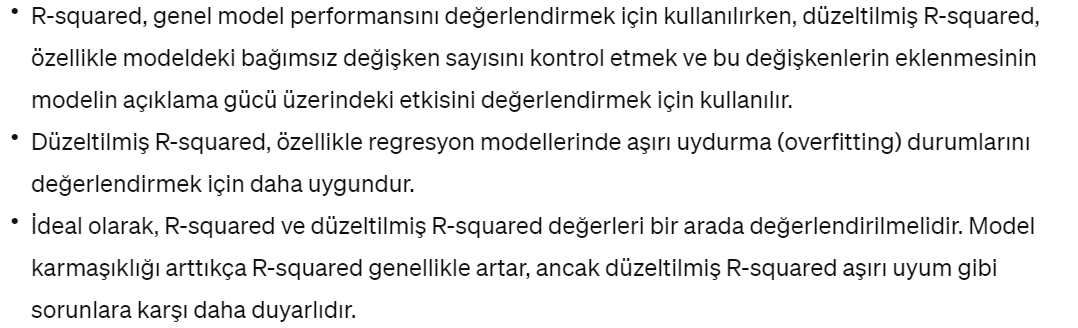

In [96]:
from sklearn.metrics import r2_score
r2_score(y,rf_reg.predict(X))

0.9704434230386582

CASE II

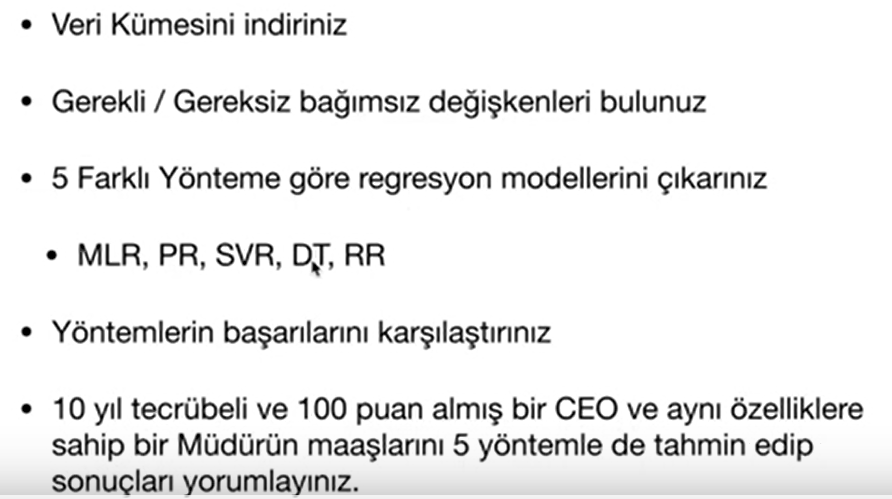

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [98]:
df=pd.read_csv("maaslar_yeni.csv")
df.head()

Calisan ID             unvan  UnvanSeviyesi  Kidem  Puan  maas
0           1             Cayci              1      5    70  2250
1           2          Sekreter              2      5    70  2500
2           3  Uzman Yardimcisi              3      5    70  3000
3           4             Uzman              4      5    70  4000
4           5  Proje Yoneticisi              5      5    70  5500

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Calisan ID     30 non-null     int64 
 1   unvan          30 non-null     object
 2   UnvanSeviyesi  30 non-null     int64 
 3   Kidem          30 non-null     int64 
 4   Puan           30 non-null     int64 
 5   maas           30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [100]:
df["unvan"].value_counts()

Cayci               3
Sekreter            3
Uzman Yardimcisi    3
Uzman               3
Proje Yoneticisi    3
Sef                 3
Mudur               3
Direktor            3
C-level             3
CEO                 3
Name: unvan, dtype: int64

In [101]:
df["Kidem"].value_counts()

5     10
7      3
4      3
1      3
2      3
8      3
9      3
10     2
Name: Kidem, dtype: int64

In [102]:
df["Puan"].value_counts()

70    10
38     2
50     2
99     2
11     1
81     1
2      1
71     1
91     1
53     1
42     1
20     1
58     1
35     1
80     1
62     1
9      1
83     1
Name: Puan, dtype: int64

In [103]:
veri=df.drop("unvan",axis=1)

In [104]:
from sklearn.preprocessing import StandardScaler
df=veri.apply(lambda x : StandardScaler().fit_transform(x.values.reshape(-1,1)).flatten())
df

Calisan ID  UnvanSeviyesi     Kidem      Puan      maas
0    -1.675247      -1.566699 -0.164032  0.439000 -0.650333
1    -1.559712      -1.218544 -0.164032  0.439000 -0.631453
2    -1.444178      -0.870388 -0.164032  0.439000 -0.593695
3    -1.328644      -0.522233 -0.164032  0.439000 -0.518177
4    -1.213110      -0.174078 -0.164032  0.439000 -0.404900
5    -1.097575       0.174078 -0.164032  0.439000 -0.253865
6    -0.982041       0.522233 -0.164032  0.439000 -0.065071
7    -0.866507       0.870388 -0.164032  0.439000  0.312517
8    -0.750973       1.218544 -0.164032  0.439000  1.067694
9    -0.635438       1.566699 -0.164032  0.439000  2.955635
10   -0.519904      -1.566699  0.593039  1.603422 -0.669212
11   -0.404370      -1.218544  0.593039 -2.010301 -0.631453
12   -0.288836      -0.870388  0.593039  0.117781 -0.518177
13   -0.173301      -0.522233 -0.542568 -0.845879 -0.593695
14   -0.057767      -0.174078 -1.678175  0.840525 -0.442659
15    0.057767       0.174078 -1.299639 -0.966336 -0.442659
16    0.173301       0.522233  0.971575  1.603422  0.085964
17    0.288836       0.870388 -0.542568 -0.042829  0.010447
18    0.404370       1.218544 -1.299639 -1.568623  0.312517
19    0.519904       1.566699 -0.542568 -0.685269  0.841141
20    0.635438      -1.566699  0.971575 -1.929996 -0.654109
21    0.750973      -1.218544 -1.299639 -0.243592 -0.654109
22    0.866507      -0.870388  0.971575 -0.364049 -0.608798
23    0.982041      -0.522233  1.350111  1.282202 -0.367142
24    1.097575      -0.174078  1.350111  0.479153 -0.412452
25    1.213110       0.174078 -1.678175 -2.291368 -0.518177
26    1.328644       0.522233  1.728646  0.880678  0.085964
27    1.444178       0.870388  1.728646 -0.845879 -0.065071
28    1.559712       1.218544 -1.678175 -0.364049  0.312517
29    1.675247       1.566699  1.350111  0.960983  3.710811

In [105]:
y=df[["maas"]]
X=df.drop(["maas","Calisan ID"],axis=1)

In [106]:
linear_reg=LinearRegression().fit(X,y)
tree_reg=DecisionTreeRegressor().fit(X,y)
rf_reg=RandomForestRegressor().fit(X,y)
sv_reg=SVR().fit(X,y)

<ipython-input-106-749f4e03b9d2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg=RandomForestRegressor().fit(X,y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
linear_reg_pr=linear_reg.predict(X)
tree_reg_pr=tree_reg.predict(X)
rf_reg_pr=rf_reg.predict(X)
sv_reg_pr=sv_reg.predict(X)

In [108]:
from sklearn.metrics import r2_score
print(f"""
r2 score - LinearRegression : {r2_score(y,linear_reg_pr)},
r2 score - DecisionTreeRegresiion: {r2_score(y,tree_reg_pr)},
r2 score - RandomForestRegression : {r2_score(y,rf_reg_pr)},
r2 score - SVMRegression : {r2_score(y,sv_reg_pr)}
""")


r2 score - LinearRegression : 0.585720705085402,
r2 score - DecisionTreeRegresiion: 1.0,
r2 score - RandomForestRegression : 0.9644033547646208,
r2 score - SVMRegression : 0.6287203839391853



In [109]:
#OLS yapılacak--> 2. şık cevap:
import statsmodels.api as sm
model_rf=sm.OLS(rf_reg_pr,X)
print(model_rf.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              16.09
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    3.39e-06
Time:                        18:07:44   Log-Likelihood:                         -24.312
No. Observations:                  30   AIC:                                      54.62
Df Residuals:                      27   BIC:                                      58.83
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [110]:
df.columns

Index(['Calisan ID', 'UnvanSeviyesi', 'Kidem', 'Puan', 'maas'], dtype='object')

In [111]:
#tahmin
list=[]

tahmin=list.append({
    'UnvanSeviyesi':10,
    'Kidem': 10,
    'Puan':100,
    })


tahmin=pd.DataFrame(list)
tahmin

UnvanSeviyesi  Kidem  Puan
0             10     10   100

In [112]:
rf_reg.predict(tahmin)

array([3.14593909])

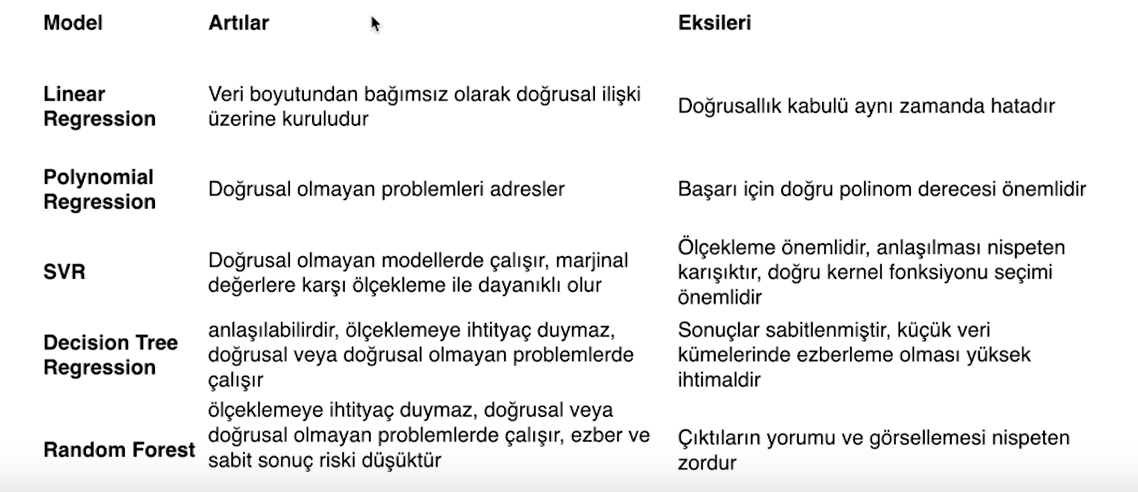

In [113]:
#sınıflandırma - classification

In [114]:
veri=pd.read_csv("veriler.csv")
veri

ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

In [115]:
#ulke
from sklearn.preprocessing import OneHotEncoder
data_x=veri.copy()

data=OneHotEncoder().fit_transform(data_x["ulke"].values.reshape(-1,1)).toarray()
data=pd.DataFrame(data,columns=["us","tr","fr"])

data_x=data_x.drop("ulke",axis=1)

df=pd.concat([data,data_x],axis=1)
df.head()

us   tr   fr  boy  kilo  yas cinsiyet
0  0.0  1.0  0.0  130    30   10        e
1  0.0  1.0  0.0  125    36   11        e
2  0.0  1.0  0.0  135    34   10        k
3  0.0  1.0  0.0  133    30    9        k
4  0.0  1.0  0.0  129    38   12        e

In [116]:
#cinsiyet
from sklearn.preprocessing import LabelEncoder
df_x=df.copy()

le=LabelEncoder().fit_transform(df_x["cinsiyet"].values.reshape(-1,1))#0=e ,1=k

le_x=pd.DataFrame(le,columns=["cinsiyet"])

df_x=df_x.drop("cinsiyet",axis=1)

df_encoded=pd.concat([df_x,le_x],axis=1)
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


us   tr   fr  boy  kilo  yas  cinsiyet
0  0.0  1.0  0.0  130    30   10         0
1  0.0  1.0  0.0  125    36   11         0
2  0.0  1.0  0.0  135    34   10         1
3  0.0  1.0  0.0  133    30    9         1
4  0.0  1.0  0.0  129    38   12         0

In [117]:
y=df_encoded["cinsiyet"]
X=df_encoded.drop("cinsiyet",axis=1)

In [118]:
from sklearn.preprocessing import StandardScaler
X_standard=X.apply(lambda x:StandardScaler().fit_transform(x.values.reshape(-1,1)).flatten())
X_standard

us       tr        fr       boy      kilo       yas
0  -0.68313  1.20185 -0.612372 -1.620187 -1.475889 -1.472173
1  -0.68313  1.20185 -0.612372 -1.862994 -1.200334 -1.393371
2  -0.68313  1.20185 -0.612372 -1.377379 -1.292185 -1.472173
3  -0.68313  1.20185 -0.612372 -1.474502 -1.475889 -1.550975
4  -0.68313  1.20185 -0.612372 -1.668748 -1.108482 -1.314568
5  -0.68313  1.20185 -0.612372  0.807886  1.279660  0.103876
6  -0.68313  1.20185 -0.612372  1.293501  0.820402 -0.290136
7  -0.68313  1.20185 -0.612372  0.565079  1.279660  0.497888
8  -0.68313  1.20185 -0.612372  0.662202 -0.098114 -0.526544
9  -0.68313 -0.83205  1.632993  1.050693  1.968547  0.340283
10 -0.68313 -0.83205  1.632993  0.079464 -0.327743 -0.132531
11 -0.68313 -0.83205  1.632993 -0.406150 -0.557372  1.207110
12 -0.68313 -0.83205  1.632993 -0.163343 -0.189966  0.813098
13 -0.68313 -0.83205  1.632993 -0.066220 -0.144040  0.970703
14 -0.68313 -0.83205  1.632993  0.176587 -0.006263  2.073937
15  1.46385 -0.83205 -0.612372  0.516517  0.361144  1.443518
16  1.46385 -0.83205 -0.612372  1.439185  1.279660 -0.447741
17  1.46385 -0.83205 -0.612372  1.147816  0.820402 -0.132531
18  1.46385 -0.83205 -0.612372  0.953570  1.187809 -0.053729
19  1.46385 -0.83205 -0.612372 -0.211905 -1.016631  0.025074
20  1.46385 -0.83205 -0.612372  0.030903  0.177441  0.261481
21  1.46385 -0.83205 -0.612372  0.128026 -0.281818  1.049505

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standard,y,test_size=0.33,random_state=0)

In [120]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [121]:
y_pred=logr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0])

In [122]:
y_test

20    1
10    1
14    1
13    1
1     0
21    1
11    1
19    1
Name: cinsiyet, dtype: int64

In [123]:
#karmaşıklık matrisi
# accuaracy --> dogru sınıflandırılanların oranı.

In [124]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [3, 4]])

In [125]:
#knn sınıflandırıcısı
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski").fit(X_train,y_train)

In [126]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0])

In [127]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [3, 4]])

In [128]:
#Destek Vektör Makineleri
from sklearn.svm import SVC
svc=SVC(kernel="linear").fit(X_train,y_train)#"rbf","poly" ,...

In [129]:
y_pred=svc.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1])

In [130]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [2, 5]])

In [131]:
#kernel trick -- (çekirdek hilesi)
# -->boyut indirgeme -->boyut yükseltme

In [132]:
#Naive Bayes -->Guassian,Multinominal,bernolli (dagılımlarla alakalı)
#tahmin edeceğiniz sınıf sürekli bir değerse,nominal degerler,binary değerler.

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train,y_train)


In [133]:
y_pred=nb.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0])

In [134]:
y_test

20    1
10    1
14    1
13    1
1     0
21    1
11    1
19    1
Name: cinsiyet, dtype: int64

In [135]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [3, 4]])

In [136]:
#Karar Ağaçları
## criterion --> gini - entropi kullanımını sağlar.

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)


In [137]:
y_pred=dt.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1])

In [138]:
y_test

20    1
10    1
14    1
13    1
1     0
21    1
11    1
19    1
Name: cinsiyet, dtype: int64

In [139]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 6]])

In [140]:
#Rassal Ağaçlar (Random Forest)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy").fit(X_train,y_train)

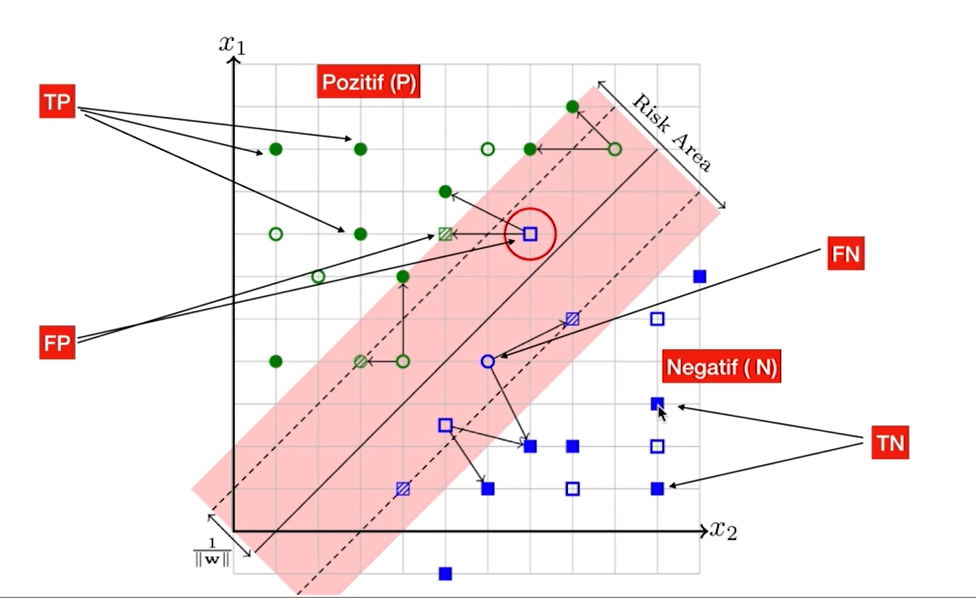

In [141]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0])

In [142]:
y_test

20    1
10    1
14    1
13    1
1     0
21    1
11    1
19    1
Name: cinsiyet, dtype: int64

In [143]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [3, 4]])

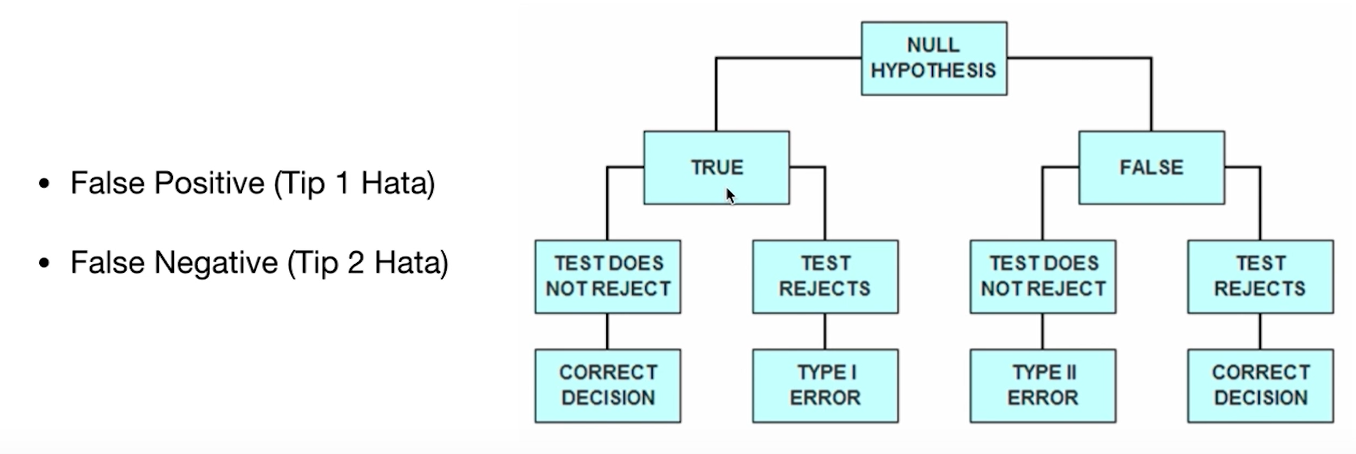

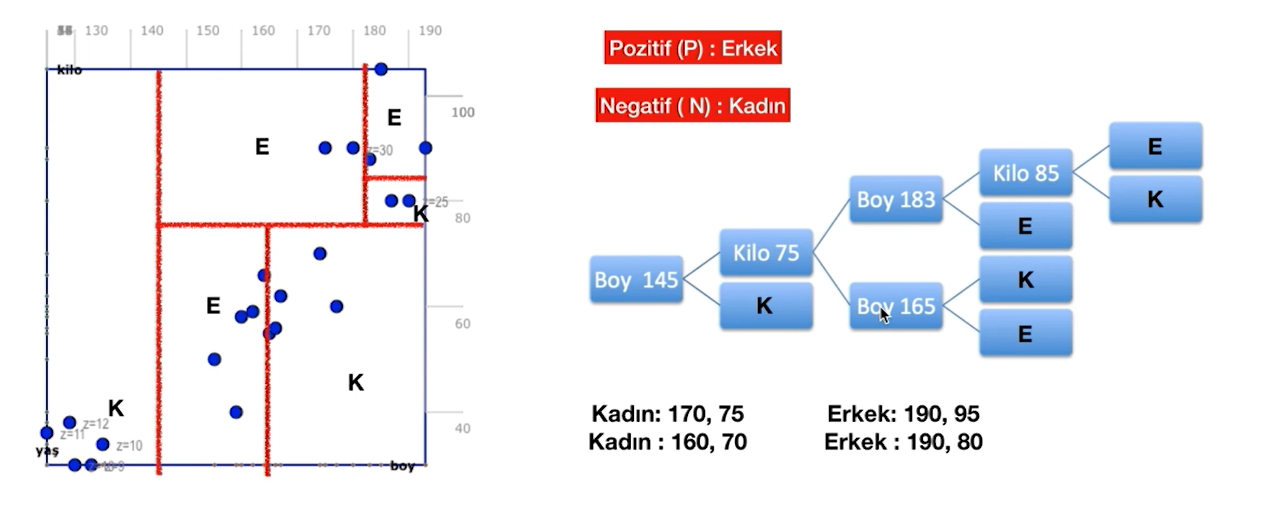

In [144]:
#ZeroR algoritması --> doğruluk algoritması (confusion matrix için kullanılır.)

In [145]:
y_proba=rfc.predict_proba(X_test)
y_proba #--> e veya k grubun ait olma olasılıkları

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.3, 0.7],
       [0.5, 0.5]])

In [146]:
x=[[y_proba[:,0]]]

In [147]:
from sklearn.metrics import auc
from sklearn import metrics

In [148]:
# fpr,tpr,thold =metrics.roc_curve(y_test,x,pos_label="0")
# print(f"""
# fpr: {fpr},
# tpr:{tpr},
# thold:{thold}
# """)--> HATA ALIYORUM.

CASE III

In [149]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

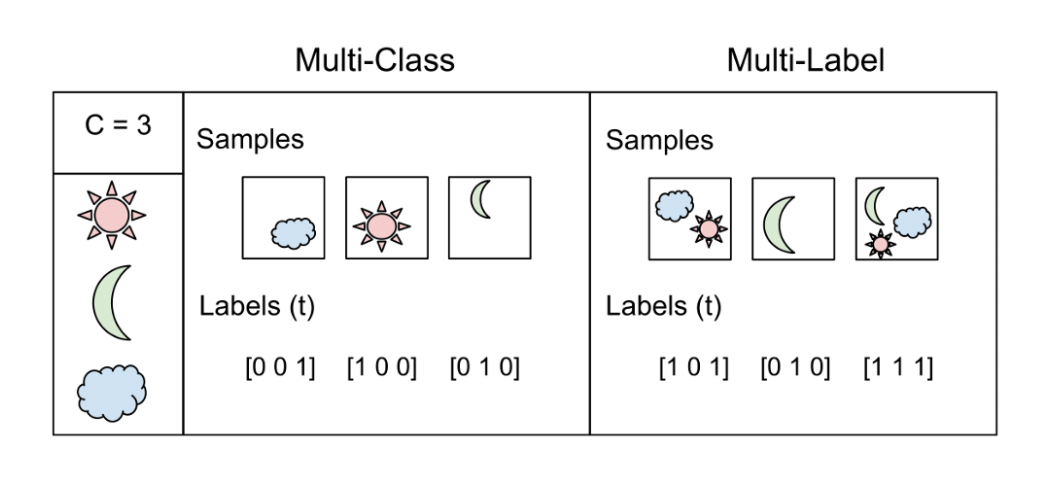

In [150]:
data=pd.read_excel("Iris.xls")
data.head()

sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [152]:
data["iris"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris, dtype: int64

In [153]:
#from sklearn.preprocessing import OneHotEncoder
data_encoded=OneHotEncoder().fit_transform(data["iris"].values.reshape(-1,1)).toarray()
data_enc=pd.DataFrame(data_encoded,columns=["Class_A","Class_B","Class_C"])
data_enc.head()

Class_A  Class_B  Class_C
0      1.0      0.0      0.0
1      1.0      0.0      0.0
2      1.0      0.0      0.0
3      1.0      0.0      0.0
4      1.0      0.0      0.0

In [154]:
data=data.drop("iris",axis=1)

In [155]:
data=pd.concat([data,data_enc],axis=1)
data.head()

sepal length  sepal width  petal length  petal width  Class_A  Class_B  \
0           5.1          3.5           1.4          0.2      1.0      0.0   
1           4.9          3.0           1.4          0.2      1.0      0.0   
2           4.7          3.2           1.3          0.2      1.0      0.0   
3           4.6          3.1           1.5          0.2      1.0      0.0   
4           5.0          3.6           1.4          0.2      1.0      0.0   

   Class_C  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [156]:
X=data.drop(["Class_A","Class_B","Class_C"],axis=1)
y=data.drop(["sepal length",	"sepal width",	"petal length",	"petal width"],axis=1)

In [157]:
#from sklearn.preprocessing import StandardScaler
data_scaled=StandardScaler().fit_transform(X)
data_sc=pd.DataFrame(data_scaled,columns=X.columns)

X=data_sc.copy()

In [158]:
X

sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]

In [159]:
y

Class_A  Class_B  Class_C
0        1.0      0.0      0.0
1        1.0      0.0      0.0
2        1.0      0.0      0.0
3        1.0      0.0      0.0
4        1.0      0.0      0.0
..       ...      ...      ...
145      0.0      0.0      1.0
146      0.0      0.0      1.0
147      0.0      0.0      1.0
148      0.0      0.0      1.0
149      0.0      0.0      1.0

[150 rows x 3 columns]

In [160]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [161]:
#from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy").fit(X_train,y_train)

In [162]:
y_pred=rf.predict(X_test)
y_pred

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [163]:
from sklearn.preprocessing import LabelBinarizer

In [164]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

In [165]:
y_test_bin

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [166]:
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
cm=multilabel_confusion_matrix(y_test_bin,y_pred_bin)
cm

array([[[34,  0],
        [ 0, 16]],

       [[30,  1],
        [ 1, 18]],

       [[34,  1],
        [ 1, 14]]])

In [167]:
veri=pd.read_excel("Iris.xls")
veri.head()

sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [168]:
X=veri.drop("iris",axis=1)
y=veri["iris"]

In [169]:
#Standartlaştırma
from sklearn.preprocessing import StandardScaler
import pandas as pd
data_scl=StandardScaler().fit_transform(X)
data1=pd.DataFrame(data_scl,columns=X.columns)

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [171]:
from sklearn.svm import SVC
model=SVC().fit(X_train,y_train)

In [172]:
y_pred=model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [173]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]])

In [174]:
#Denetimsiz Öğrenim
## Kümeleme /Clustering: Müşteri Segmentasyonu,Pazar Segmentasyonu,Sağlık ve Görüntü İşleme
##a)müşteri seg. :Collabrating Filtering,Özel Kampanyalar,Tehdit ve Sahtekarlık Yakalama,Eksik Verilerin Tamamlanması,Verinin alt kümesi üzerinde yapılan bütün işlemler
##b)Pazar seg. :davranışsal seg.,demografik seg.,psikolojik seg.,coğrafi seg.,Verinin alt kümesi üzerinde yapılan bütün işlemler

In [175]:
#K Means (Alternatif :X Means - Farklı olarak burada kaç küme olacağı bizim tarafımızdan belirlenirken x meanste daha farklıdır.)
data=pd.read_csv("musteriler.csv")
data.head()

No Cinsiyet  Yas  Hacim  Maas
0   1        K   60  69900  6325
1   2        K   30  79000  5200
2   3        E   52  85500  7825
3   4        E   57  17100  8375
4   5        E   55   5500  5450

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [177]:
from sklearn.preprocessing import LabelEncoder
data["Cinsiyet"]=LabelEncoder().fit_transform(data["Cinsiyet"])
data.head()

No  Cinsiyet  Yas  Hacim  Maas
0   1         1   60  69900  6325
1   2         1   30  79000  5200
2   3         0   52  85500  7825
3   4         0   57  17100  8375
4   5         0   55   5500  5450

In [178]:
y=data["Maas"]
X=data.drop(["Maas","No"],axis=1)

In [179]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[4.44444444e-01 4.62638889e+01 6.39152778e+04]
 [4.56521739e-01 4.14456522e+01 2.35391304e+04]
 [3.88888889e-01 5.79722222e+01 1.09905556e+05]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [180]:
sonuclar=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i , init="k-means++",random_state=123)
  kmeans.fit(X)
  sonuclar.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

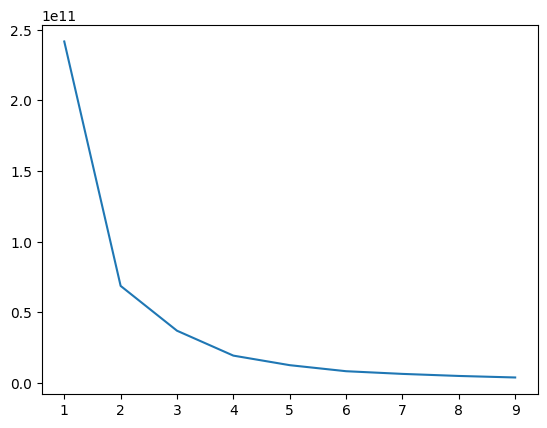

In [181]:
plt.plot(range(1,10),sonuclar)

In [182]:
#Hiyerarşik Bölütleme
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_pred=ac.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [183]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0])

In [184]:
# plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c="red", alpha=0.5)
# plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c="blue", alpha=0.5)
# plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c="green", alpha=0.5)
# plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=100, c="green", alpha=0.5)

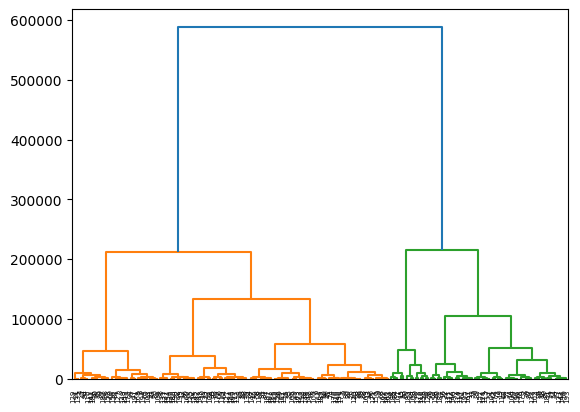

In [185]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

In [186]:
#Apriori Algoritması --> buna ... bunu'da ...(aldı,yaptı,izledi vs.)
##Nerelerde kullanılır:complex event processing,kampanya,davranış tahmini,yönlendirilmiş ARM,Zaman Serisi Analizi (ARM/ARL)
!wget http://bilkav.com/sepet.csv
veri=pd.read_csv("sepet.csv",header=None)

--2023-12-12 18:07:50--  http://bilkav.com/sepet.csv
Resolving bilkav.com (bilkav.com)... 191.96.144.254, 2a02:4780:1e:f4b9:d4ee:b30:67d9:fa87
Connecting to bilkav.com (bilkav.com)|191.96.144.254|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bilkav.com/sepet.csv [following]
--2023-12-12 18:07:51--  https://bilkav.com/sepet.csv
Connecting to bilkav.com (bilkav.com)|191.96.144.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘sepet.csv’

sepet.csv               [  <=>               ] 303.13K  1.19MB/s    in 0.2s    

2023-12-12 18:07:52 (1.19 MB/s) - ‘sepet.csv’ saved [310409]



In [187]:
del list
liste=[]
for i in range(0,7501):
  liste.append([str(veri.values[i,j]) for j in range(0,20)])

In [188]:
!pip install apyori

In [189]:
# Arguments:
#     transactions -- A transaction iterable object
#                     (eg. [['A', 'B'], ['B', 'C']])

In [190]:
from apyori import apriori
rule=apriori(liste,min_support=0.01,min_confidence=0.2,min_lift=3,min_length=2)
print(list(rule))

[RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]), RelationRecord(items=frozenset({'ground beef', 'herb & pepper', 'nan'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef', 'nan'}), confidence=0.3234501347708895, lift=3.2919938411349285), OrderedStatistic(items_base=frozenset({'herb & pepper', 'nan'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])]


In [191]:
#Takviyeli Pekiştirmeli Öğrenme -->Reinforced Learning
#Alpha Go,Robotlar

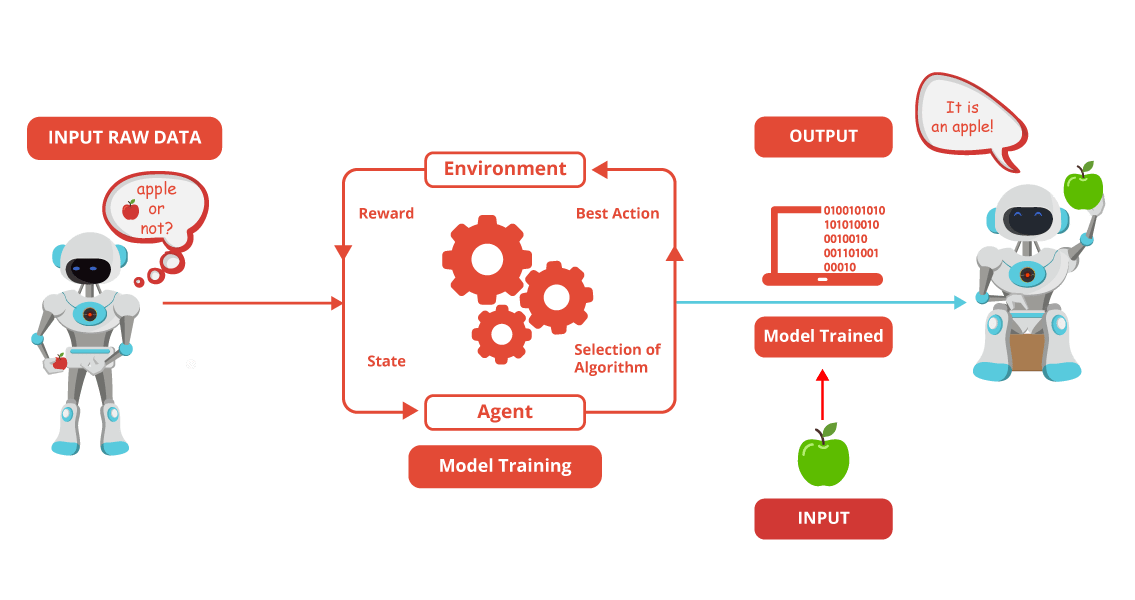

In [192]:
#UCB Algoritması
veri=pd.read_csv("Ads_CTR_Optimisation.csv")
veri

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]

In [193]:
import random
N=10000
d=10
toplam=0
secilenler=[]
for n in range(0,N):
  ad=random.randrange(d)
  secilenler.append(ad)
  prize=veri.values[n,ad]#verilerdeki n. satır =1 ise ödül= 1.
  toplam=toplam+prize

In [194]:
toplam

1241

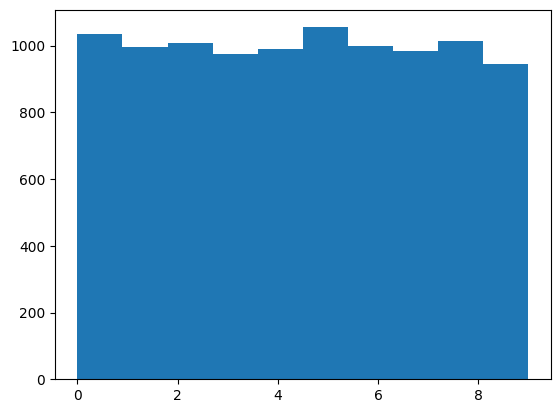

In [195]:
plt.hist(secilenler)
plt.show()

In [196]:
N=10000#10000 tıklama
d=10#10 ilan var toplamda
#Ri(n)
oduller=[0] * d #10 ilanında ödülleri ilk başta 0
#Ni(n)
tiklamalar=[0] * d #o ana kadarki tıklamalar
toplam=0

secilenler = []
import math

for n in range(0,N):
  ad=0#seçilen ilan
  max_ucb=0
  for i in range(0,d):#en fazla ucbye sahip olanı bul.
    if(tiklamalar[i]>0):
      ortalama=oduller[i]/tiklamalar[i]
      delta=math.sqrt(3/2 * math.log(n)/tiklamalar[i])
      ucb=ortalama+delta
    else:
      ucb=N*10
    if max_ucb< ucb: #maxtan büyük bir ucb çıktı.
      max_ucb= ucb
      ad=i
  secilenler.append(ad)
  tiklamalar[ad]=tiklamalar[ad]+1
  odul=veri.values[n,ad]
  oduller[ad]=oduller[ad]+odul
  toplam=toplam+odul

print(f"toplam_odul : {toplam}")

toplam_odul : 2211


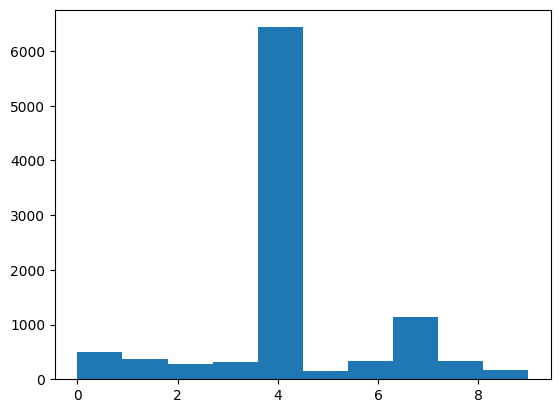

In [197]:
plt.hist(secilenler)
plt.show()

In [198]:
#Thompson Örneklemesi
N=10000#10000 tıklama
d=10#10 ilan var toplamda
#Ri(n)
#Ni(n)
toplam=0

secilenler = []
birler=[0] * d
sifirlar=[0] * d

for n in range(1,N):
  ad=0#seçilen ilan
  max_th=0
  for i in range(0,d):#en fazla thye sahip olanı bul.
    rasbeta=random.betavariate(birler[i]+1,sifirlar[i]+1)
    if rasbeta > max_th:
      max_th = rasbeta
      ad=i
  secilenler.append(ad)
  odul=veri.values[n,ad]
  if odul==1:
    birler[ad]=birler[ad]+1
  else:
    sifirlar[ad]=sifirlar[ad]+1
  toplam=toplam+odul

print(f"toplam_odul : {toplam}")

toplam_odul : 2611


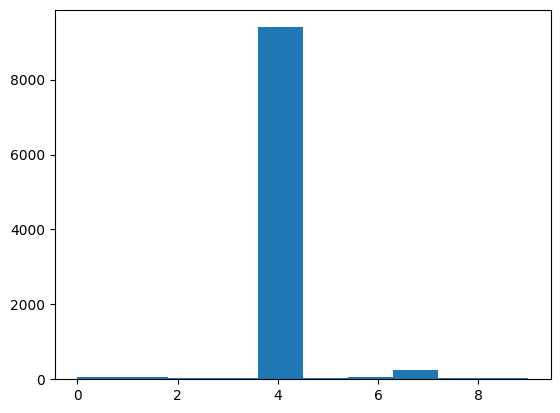

In [199]:
plt.hist(secilenler)
plt.show()

In [200]:
#NLP
#Hedefler --> NLU - NLG
#Yaklasımlar --> Linguistik,İstatiksel,Hibrit
#Linguistik: pragmatics,semantics,syntax,morphology
#İstatiksel Yaklaşımlar :N-gram,TF-IDF,Word Gram,BOW(bag of words)
#Hibrit Yaklaşımlar:Metindeki kelime tiplerinin dağılımı ve cümle yapıları

In [201]:
#!wget https://bilkav.com/Restaurant_Reviews.csv

In [202]:
df=pd.read_csv("Restaurant_Reviews.csv",sep= ";")
df.head()#veriyi temizledim.

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [203]:
import re
df_0=re.sub('[^\w\s]'," ",df["Review"][0])
df_0#noktalama işaretleri

'Wow    Loved this place '

In [204]:
df_0.lower()

'wow    loved this place '

In [205]:
yorum=df_0.split()
yorum

['Wow', 'Loved', 'this', 'place']

In [206]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [207]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()#kök

In [208]:
from nltk.corpus import stopwords

In [209]:
yorum =[ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words("english"))]
yorum

['wow', 'love', 'place']

In [210]:
yorum=" ".join(yorum)
yorum

'wow love place'

In [211]:
derlem=[]
for i in range(710):
  yorum=re.sub('[^\w\s]'," ",df["Review"][i])
  yorum=yorum.lower()
  yorum=yorum.split()
  yorum =[ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words("english"))]
  yorum=" ".join(yorum)
  derlem.append(yorum)

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)
X=cv.fit_transform(derlem).toarray()
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(X_train,y_train)

y_pred=gnb.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [213]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[40, 28],
       [ 7, 67]])

In [214]:
#Boyut İndirgeme -PCA & LDA
##kullanım alanları:gürültülü filtreleme,görselleştirme,öznitelik çıkarımı,öznitelik eleme,borsa analizi,sağlık verileri
!wget https://bilkav.com/Wine.csv

--2023-12-12 18:08:04--  https://bilkav.com/Wine.csv
Resolving bilkav.com (bilkav.com)... 154.41.250.226, 2a02:4780:1d:70d0:173d:2225:bd07:2376
Connecting to bilkav.com (bilkav.com)|154.41.250.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘Wine.csv’

Wine.csv                [ <=>                ]  11.20K  --.-KB/s    in 0s      

2023-12-12 18:08:04 (76.0 MB/s) - ‘Wine.csv’ saved [11464]



In [215]:
veri=pd.read_csv("Wine.csv")
veri.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [216]:
X=veri.drop("Customer_Segment",axis=1)
y=veri["Customer_Segment"]

In [217]:
from sklearn.preprocessing import StandardScaler
X_standard=StandardScaler().fit_transform(X)
X_standard[0:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standard,y,test_size=0.2,random_state=0)

In [219]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)#n_components:indirgenmek istenen sütun sayısı
X_train1=pca.fit_transform(X_train)
X_train1[0:5]

array([[-2.21627675, -0.99947455],
       [-1.76925781,  1.61300784],
       [ 1.17230703,  2.17064305],
       [-2.6014977 , -1.609546  ],
       [ 1.86604905,  0.25746789]])

In [220]:
X_test1=pca.transform(X_test)
X_test1[0:5]

array([[ 2.18260094, -1.07829946],
       [-2.55593867, -1.87697451],
       [ 2.22444866,  1.71273398],
       [ 2.47922076, -1.43371292],
       [-0.30571137,  0.52687402]])

In [221]:
from sklearn.linear_model import LogisticRegression
#pca dönüşümü
model=LogisticRegression(random_state=0).fit(X_train1,y_train)
y_pred=model.predict(X_test1)
y_pred[0:5]

array([1, 3, 2, 1, 2])

In [222]:
model_x=LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred_x=model_x.predict(X_test)
y_pred_x[0:5]

array([1, 3, 2, 1, 2])

In [223]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[14,  1,  0],
       [ 0, 15,  0],
       [ 0,  0,  6]])

In [224]:
cm=confusion_matrix(y_pred_x,y_test)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [225]:
#LDA
##pca den farklı olarak sınıflar arasındaki ayrımı önemser ve maksimize etmeye çalışır
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components = 2)
X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)

In [226]:
classifier_lda=LogisticRegression(random_state=0).fit(X_train_lda,y_train)
y_pred_lda=classifier_lda.predict(X_test_lda)
y_pred_lda[0:5]

array([1, 3, 2, 1, 2])

In [227]:
cm=confusion_matrix(y_pred,y_pred_lda)
cm

array([[14,  1,  0],
       [ 0, 15,  0],
       [ 0,  0,  6]])

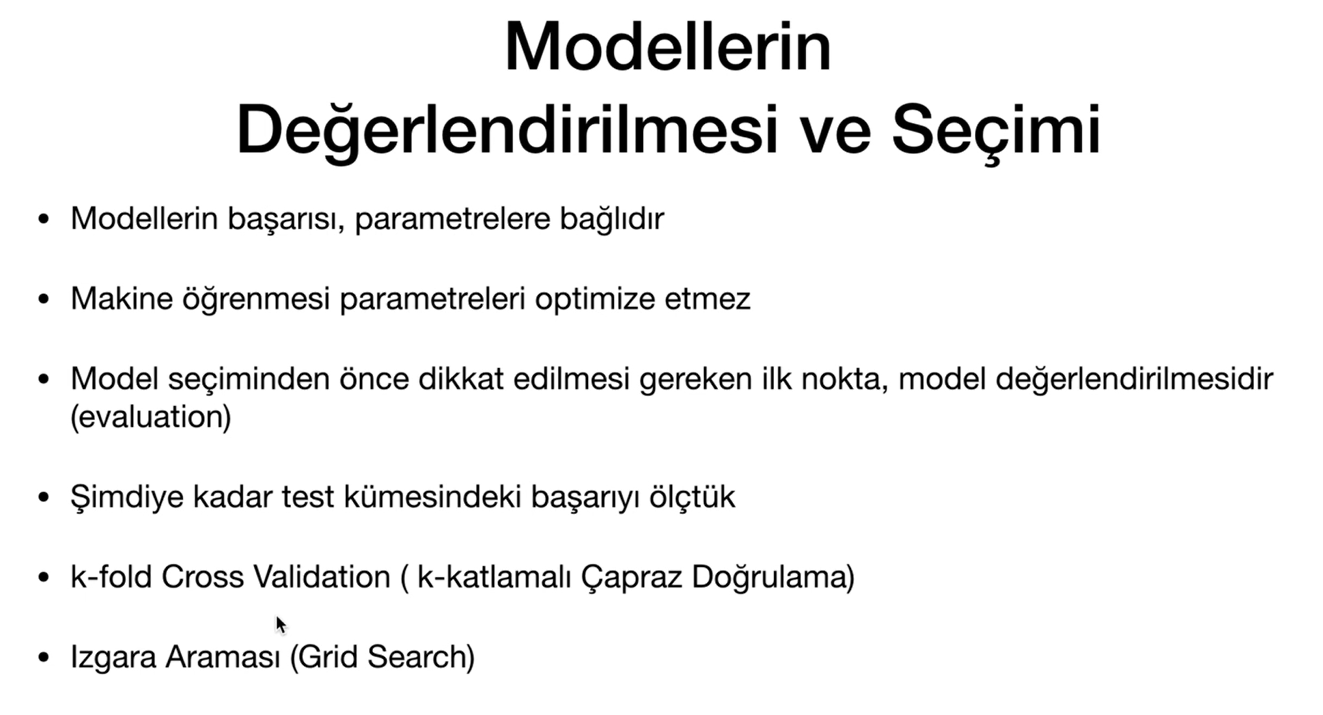

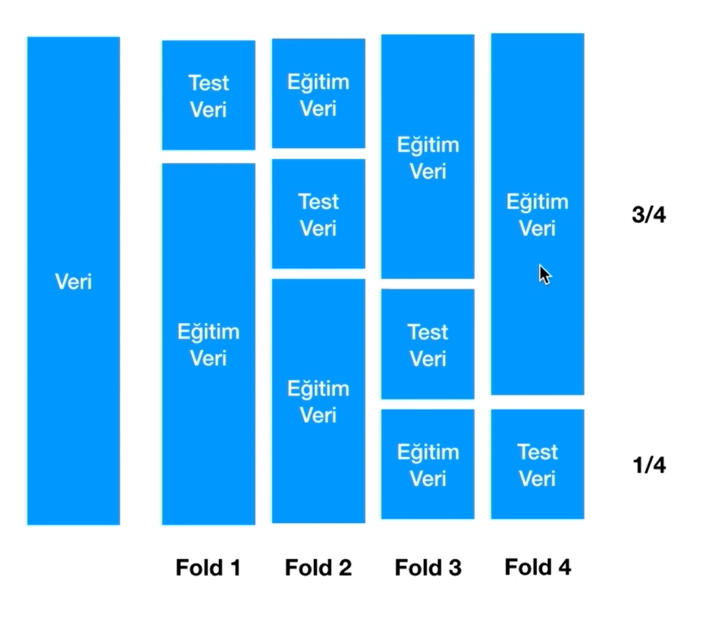

In [228]:
#Model Seçimi
data=pd.read_csv("Social_Network_Ads.csv")
data=data.drop("User ID",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [229]:
from sklearn.preprocessing import LabelEncoder
data["Gender"]=LabelEncoder().fit_transform(data[["Gender"]])
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gender   Age  EstimatedSalary  Purchased
0       1  19.0          19000.0          0
1       1  35.0          20000.0          0
2       0  26.0          43000.0          0
3       0  27.0          57000.0          0
4       1  19.0          76000.0          0

In [230]:
X=data.drop("Purchased",axis=1)
y=data["Purchased"]

In [231]:
from sklearn.preprocessing import StandardScaler
X_standard=StandardScaler().fit_transform(X)
X_standartlasmıs=pd.DataFrame(X_standard,columns=X.columns)
X_standartlasmıs.head()


Gender       Age  EstimatedSalary
0  1.020204 -1.781797        -1.490046
1  1.020204 -0.253587        -1.460681
2 -0.980196 -1.113206        -0.785290
3 -0.980196 -1.017692        -0.374182
4  1.020204 -1.781797         0.183751

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standartlasmıs,y,test_size=0.2,random_state=0)

In [233]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",random_state=0).fit(X_train,y_train)

In [234]:
y_pred=model.predict(X_test)

In [235]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[55,  3],
       [ 1, 21]])

In [236]:
from sklearn.model_selection import cross_val_score
"""
1. estimator : classifier (bizim durum) #classifier_lda
2. X
3. Y
4. kaç katmanlı
"""
basari=cross_val_score(model,X=X_train,y=y_train,cv=4)
basari.mean()

0.8968750000000001

In [237]:
#parametre optimizasyonu
from sklearn.model_selection import GridSearchCV
p = [{"C":[1,2,3,4,5],"kernel":["linear","rbf"],"gamma" : [1,0.5,0.01,0.001]}]
"""
GSCV parametreleri:
estimator : algoritma türü -neyi optimize etmek istediğimiz
param_grid:oarametreler/denenecekler
scoring :neye göre skorlanıcak :örn:accuracy
cv:kaç katmanlı olacağı
n_jobs:aynı anda çalışacak iş
"""
gcv=GridSearchCV(model,
                 param_grid=p,scoring="accuracy",
                 cv=10,n_jobs=-1)
grid_search=gcv.fit(X_train,y_train)
eniyis=grid_search.best_score_
eniyip=grid_search.best_params_
print(eniyis,eniyip)

0.9 {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [238]:
#Soru Cevap
#k yı nasıl belirleyebiliriz: kural olarak anlamlandırılmamalı
##karekök(eğitim boyutu)/2

#Modelin Kydedilmesi
##Libraries --> Pickle ,joblib, **Pmml** (dmg.org)
import pickle
dosya = "model.kayit" #bulunduğun dizine kaydedicek
pickle.dump(model,open(dosya,"wb"))

In [239]:
yuklenen=pickle.load(open(dosya,"rb")) #dosyayı okuma
yuklenen.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [240]:
#XGBoost
#xgboost.readhedocs.io
!wget https://bilkav.com/Churn_Modelling.csv

--2023-12-12 18:08:11--  https://bilkav.com/Churn_Modelling.csv
Resolving bilkav.com (bilkav.com)... 154.41.250.226, 2a02:4780:1d:70d0:173d:2225:bd07:2376
Connecting to bilkav.com (bilkav.com)|154.41.250.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘Churn_Modelling.csv’

Churn_Modelling.csv     [  <=>               ] 668.81K  2.02MB/s    in 0.3s    

2023-12-12 18:08:12 (2.02 MB/s) - ‘Churn_Modelling.csv’ saved [684858]



In [241]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [243]:
data_clean=data.drop(["RowNumber","CustomerId","Surname"],axis=1)
data_clean.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [244]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [245]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [246]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
data_clean["Gender"]=LabelEncoder().fit_transform(data_clean["Gender"])
data_clean.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France       0   42       2      0.00              1   
1          608     Spain       0   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

In [247]:
data_encode=OneHotEncoder().fit_transform(data["Geography"].values.reshape(-1,1)).toarray()
#birlestirme
data_clean=data_clean.drop("Geography",axis=1)
data_e_x=pd.DataFrame(data_encode,columns=["fr","ge","sp"])
df=pd.concat([data_e_x,data_clean],axis=1)
df.head()

fr   ge   sp  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0  1.0  0.0  0.0          619       0   42       2       0.00              1   
1  0.0  0.0  1.0          608       0   41       1   83807.86              1   
2  1.0  0.0  0.0          502       0   42       8  159660.80              3   
3  1.0  0.0  0.0          699       0   39       1       0.00              2   
4  0.0  0.0  1.0          850       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [248]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [249]:
from sklearn.preprocessing import StandardScaler
X_standard=StandardScaler().fit_transform(X)
X_standard[0:1]

array([[ 0.99720391, -0.57873591, -0.57380915, -0.32622142, -1.09598752,
         0.29351742, -1.04175968, -1.22584767, -0.91158349,  0.64609167,
         0.97024255,  0.02188649]])

In [250]:
!pip install xgboost

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [252]:
from xgboost import XGBClassifier

In [253]:
model=XGBClassifier().fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred[0:3]

array([1, 0, 0])

In [254]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1492,  103],
       [ 192,  213]])

In [255]:
from sklearn.model_selection import cross_validate
model_cv=cross_validate(model,X_train,y_train,cv=3)
model_cv

{'fit_time': array([0.89989805, 0.64664865, 0.45328283]),
 'score_time': array([0.04823017, 0.0348382 , 0.01402807]),
 'test_score': array([0.85301837, 0.84851894, 0.85183796])}

In [256]:
model_cv["test_score"].mean()

0.8511250891087977

In [257]:
#Derin Öğrenme

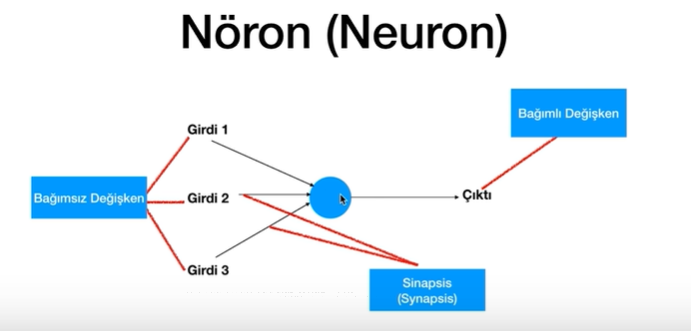

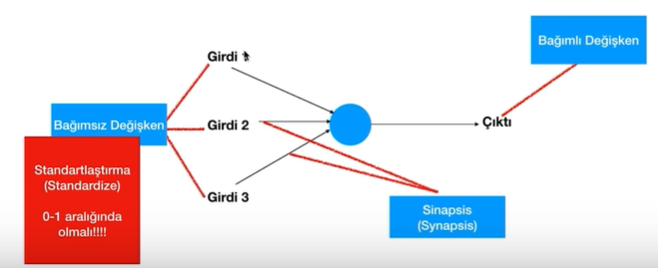

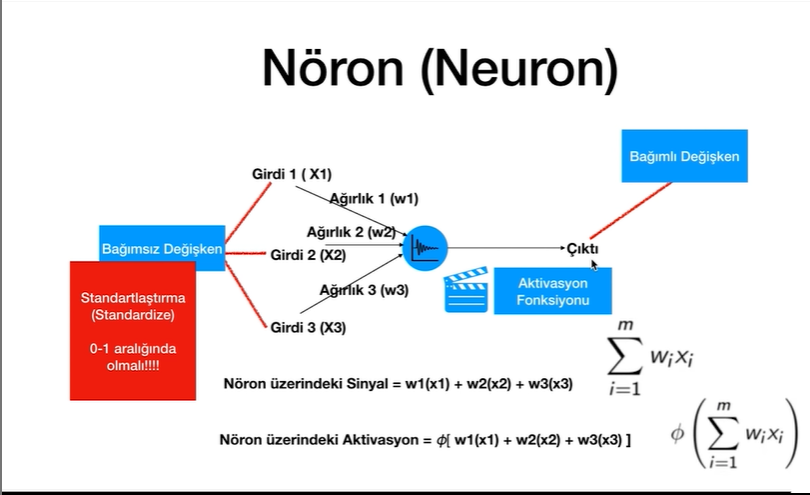

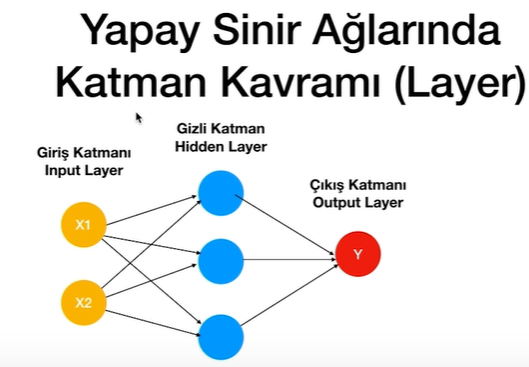

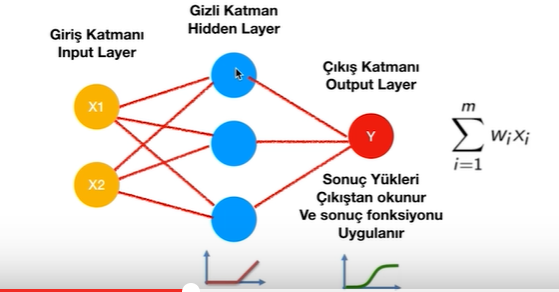

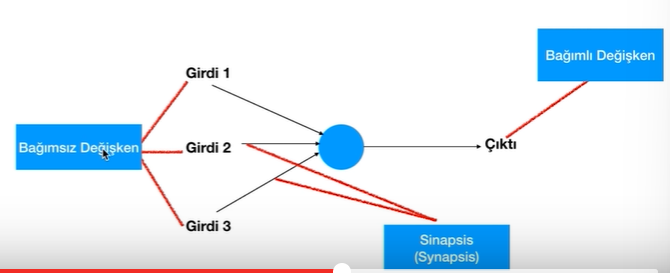

In [258]:
#gizli katmanda aktivasyon fonksiyonu vardır.Sinyallar ağırlıkla çarpılır ve oluşan bu yüklerin ateşlenip ateşlenmeyeceğini bu fonksiyon belirler.

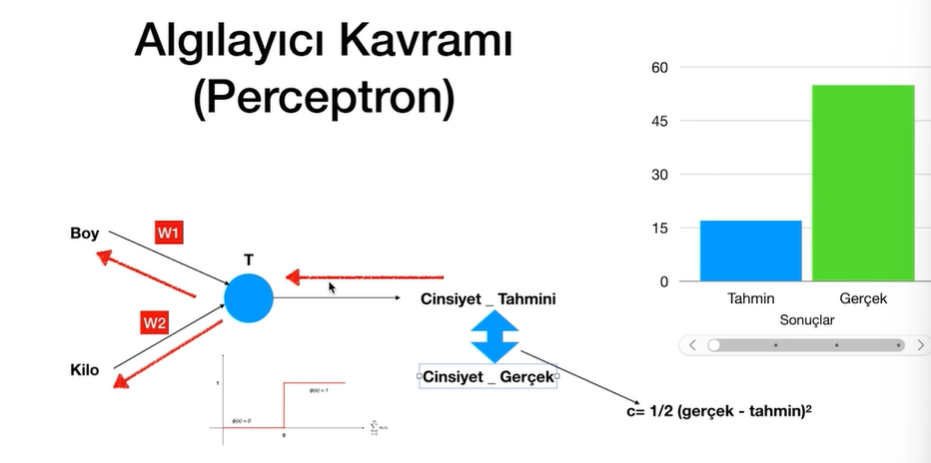

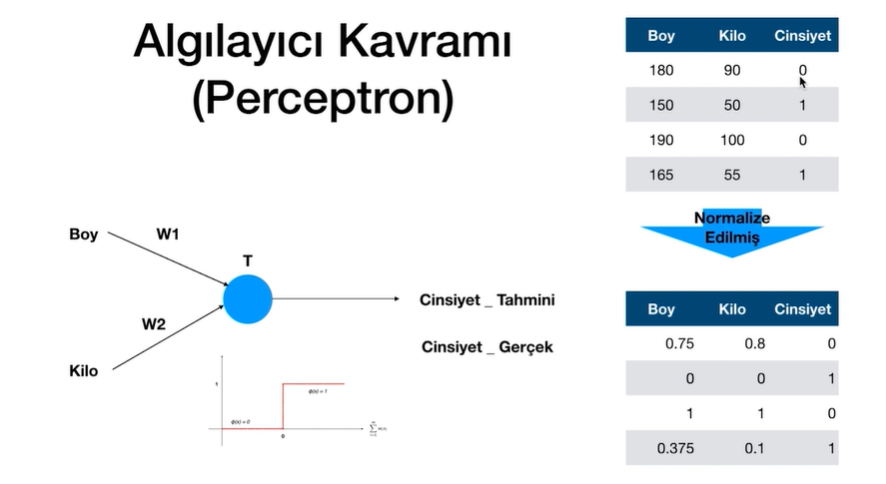

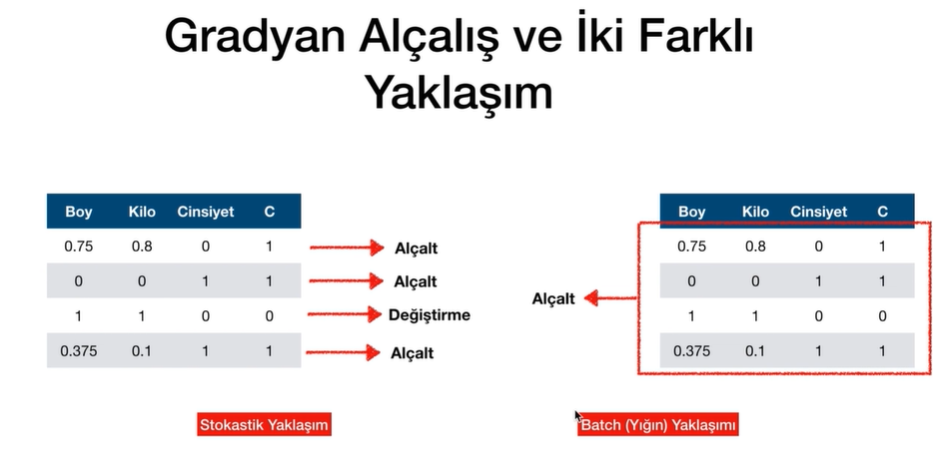

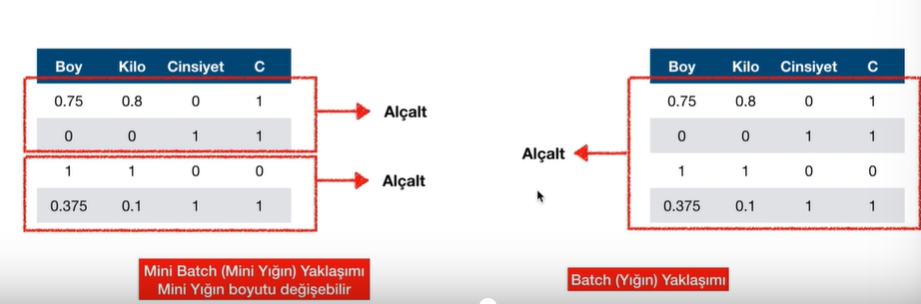

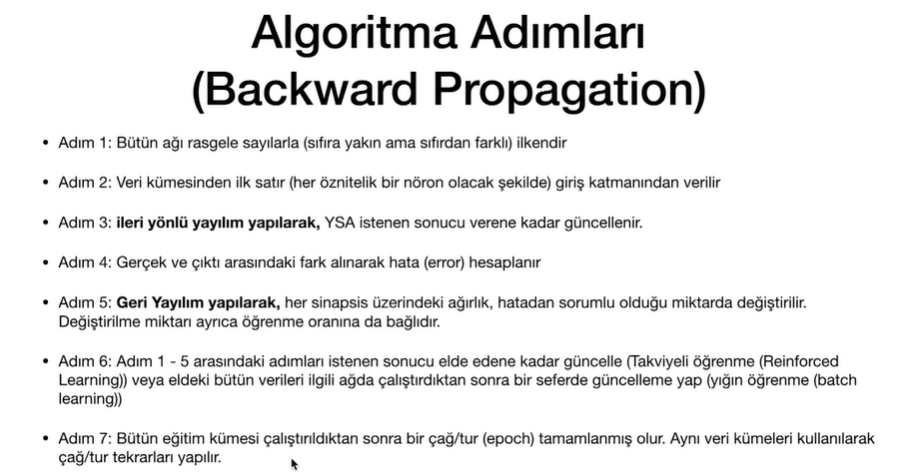

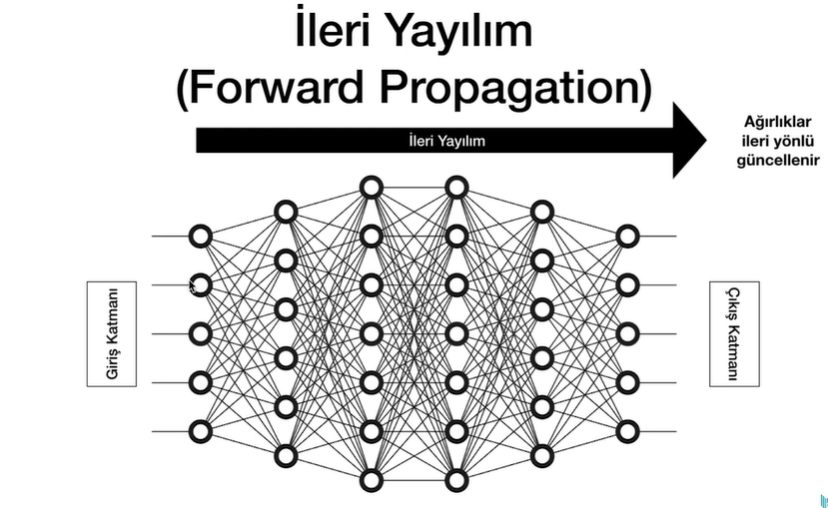

In [259]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-rl_2n8le
  Running command git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git /tmp/pip-req-build-rl_2n8le
  fatal: unable to connect to github.com:
  github.com[0: 192.30.255.113]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git /tmp/pip-req-build-rl_2n8le did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/Theano/Theano.git /tmp/pip-req-build-rl_2n8le did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [260]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [261]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.1 which is incompatible.


In [262]:
veriler=pd.read_csv("Churn_Modelling.csv")
veriler.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [263]:
veriler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [264]:
df=veriler.drop(["RowNumber","CustomerId","Surname"],axis=1)
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

In [265]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [266]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df["Gender"]=LabelEncoder().fit_transform(df["Gender"])
#df["Gender"].value_counts()

df_onehot=OneHotEncoder().fit_transform(df[["Geography"]]).toarray()
df_ohc=pd.DataFrame(df_onehot,columns=["fr","ge","sp"])

veri=pd.concat([df_ohc,df],axis=1)
veri=veri.drop("Geography",axis=1)
veri.head()

fr   ge   sp  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0  1.0  0.0  0.0          619       0   42       2       0.00              1   
1  0.0  0.0  1.0          608       0   41       1   83807.86              1   
2  1.0  0.0  0.0          502       0   42       8  159660.80              3   
3  1.0  0.0  0.0          699       0   39       1       0.00              2   
4  0.0  0.0  1.0          850       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [267]:
X=veri.drop("Exited",axis=1)
y=veri["Exited"]

In [268]:
from sklearn.preprocessing import StandardScaler
X_standard=StandardScaler().fit_transform(X)

In [269]:
##NOT:from sklearn.compose import ColumnTransformer

In [270]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_standard,y,test_size=0.33,random_state=0)

In [271]:
X_train[0:1]

array([[ 0.99720391, -0.57873591, -0.57380915, -1.79546357,  0.91241915,
        -1.61355439, -0.00442596,  0.09734114,  0.80773656, -1.54776799,
        -1.03067011,  1.09590109]])

In [272]:
X_standard[0:1]

array([[ 0.99720391, -0.57873591, -0.57380915, -0.32622142, -1.09598752,
         0.29351742, -1.04175968, -1.22584767, -0.91158349,  0.64609167,
         0.97024255,  0.02188649]])

In [273]:
#yapay sinir ağ modelleri
import keras
from keras.models import Sequential
from keras.layers import Dense

In [274]:
classifier=Sequential()#yapay sinir ağ katmanı
classifier.add(Dense(6, kernel_initializer='uniform', activation='relu', input_dim=12))
#6 tane gizi katmanda nöron ve 11 tane giriş katmanında nöron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [275]:
classifier.add(Dense(6, kernel_initializer='uniform', activation='relu'))

In [276]:
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [277]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#category_crossentropy,binary_crossentropy vs..

In [278]:
classifier.fit(X_train,y_train,epochs=50)

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 0.6653
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4600
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4304
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4283
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4233
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4141
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4218
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4189
Epoch 9/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4247
Epoch 10/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8275 - loss: 0.4139
Epoch 11/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8242 - loss: 0.4158
Epoch 12/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [279]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.5)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [280]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2532,   85],
       [ 447,  236]])

In [281]:
#Bonus-:CNN

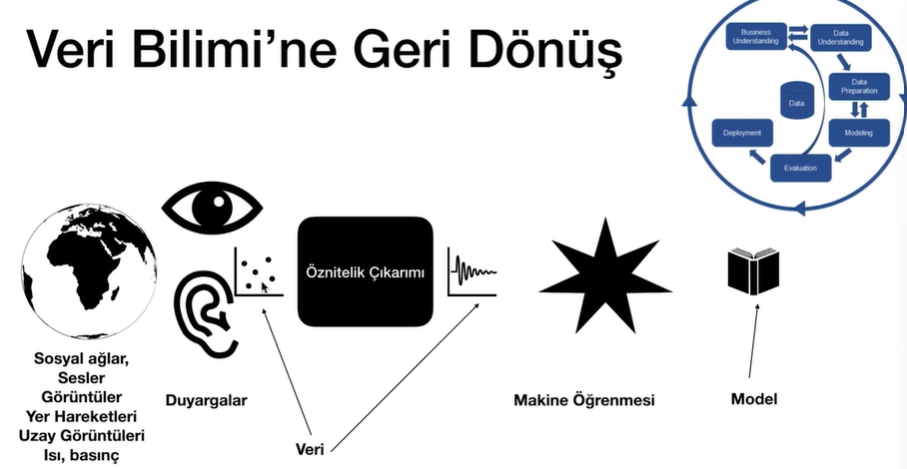

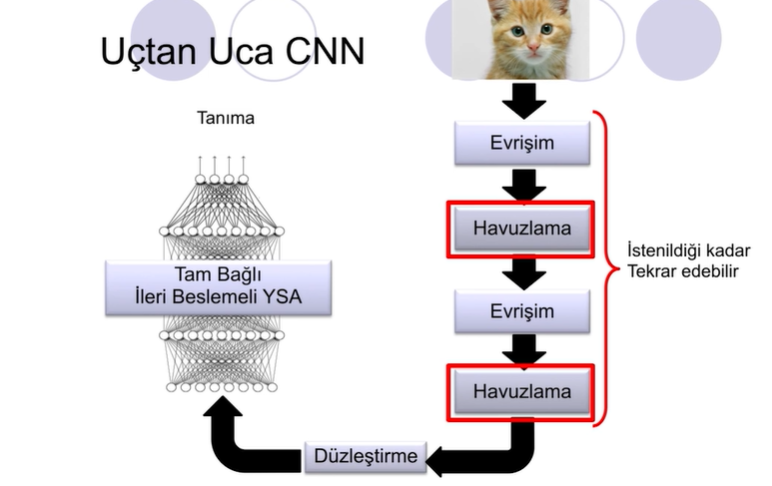

In [ ]:
from keras.models import Sequential
from keras. layers import Convolution2D
from keras. layers import MaxPooling2D
from keras. layers import Flatten
from keras. layers import Dense

# ilkleme
classifier = Sequential()

# Adım 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation="relu"))
# Adim 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# 2. convolution katman1
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adım 3 - Flattening
classifier.add(Flatten())

# Adim 4 - YSA
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=" ")

# CNN ve resimler
from keras. preprocessing. image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                  zoom_range = 0.2,horizontal_flip = True)


training_set = train_datagen.flow_from_directory('veriler/training_set',target_size = (64, 64),
                                                 batch_size = 1,class_mode = 'binary')

test_set = test_datagen.flow_from_directory('veriler/test_set',target_size = (64, 64),
                                            batch_size = 1,class_mode = 'binary')

classifier.fit_generator(training_set,samples_per_epoch = 8000,
                        nb_epoch = 1,validation_data = test_set,nb_val_samples = 2000)



In [ ]:
import numpy as np
import pandas as pd

test_set. reset ()
pred=classifier.predict_generator(test_set, verbose=1)
#pred = list(map(round, pred) )
pred [pred > .5] = 1
pred [pred <= .5] = 0
print('prediction gecti')
#labels = (training_set.class_indices)

test_labels = []
for i in range(0,int(203)):
  test_labels.extend(np.array(test_set[i] [1]))
print('test_labels')
print(test_labels)
  #labels = (training_set.class_indices)
"""
idx = []
for i in test_set:
  ixx = (test_set.batch_index - 1) * test_set.batch_size
  ixx = test_set.filenames[ixx : ixx + test_set.batch_size]
  idx.append(ixx)
  print(i)
  print(idx)
"""

dosyaisimleri = test_set.filenames
#abc = test_set.
#print(idx)
#test_labels = test_set.
sonuc = pd.DataFrame()
sonuc['dosyaisimleri']= dosyaisimleri

sonuc ['tahminler'] = pred
sonuc['test'] = test_labels

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred)
print (cm)